
focused.csv.gz and focused.T.csv.gz are rounded to 1000.


In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

1.1.5


In [3]:
import matplotlib.pyplot as plt

In [4]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [5]:
import numpy as np

# Read raw data

In [6]:
df=pd.read_csv("focused.csv.gz",header=[0,1,2,3],index_col=[0,1])
df.columns.names=['sample','pup','hkle','q']

In [7]:
df.head()

sample              02-2483-01A                                      \
pup                      paired                                       
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F   
q                           Q20   Q20   Q20   Q20   Q20   Q20   Q20   
chromosome position                                                   
chr1       1048000            0     0     0     0     0     0     0   
           1190000            0     0     0     0     0     0     0   
           1308000            0     0     0     0     0     0     0   
           1409000            4     0     0     0     0     0     0   
           1410000            1     0     0     0     0     0     0   

sample              02-2483-10A              ... TQ-A8XE-02A              \
pup                      paired              ...      paired               
hkle                   HERVK113 SVA_A SVA_B  ...       SVA_D SVA_E SVA_F   
q                           Q20   Q20   Q20  ...         Q20   Q20   Q20   
chromosome position                          ...                           
chr1       1048000            0     0     0  ...           0     0     0   
           1190000            0     0     0  ...           0     0     0   
           1308000            0     0     0  ...           0     0     0   
           1409000            2     0     0  ...           0     0     0   
           1410000            3     0     0  ...           0     0     0   

sample              TQ-A8XE-10A                                      
pup                      paired                                      
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F  
q                           Q20   Q20   Q20   Q20   Q20   Q20   Q20  
chromosome position                                                  
chr1       1048000            0     0     0     0     0     0     0  
           1190000            0     0     0     0     0     0     0  
           1308000            0     0     0     0     0     0     0  
           1409000            6     0     0     0     0     0     0  
           1410000            4     0     0     0     0     0     0  

[5 rows x 1918 columns]

In [8]:
df.shape

(17409, 1918)

# Remove "pup" and "q" as they are useless in this dataset.

In [9]:
#df.columns.droplevel(1)
df=df.droplevel('pup',axis='columns').droplevel('q',axis='columns')

In [10]:
df.head()

sample              02-2483-01A                                      \
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F   
chromosome position                                                   
chr1       1048000            0     0     0     0     0     0     0   
           1190000            0     0     0     0     0     0     0   
           1308000            0     0     0     0     0     0     0   
           1409000            4     0     0     0     0     0     0   
           1410000            1     0     0     0     0     0     0   

sample              02-2483-10A              ... TQ-A8XE-02A              \
hkle                   HERVK113 SVA_A SVA_B  ...       SVA_D SVA_E SVA_F   
chromosome position                          ...                           
chr1       1048000            0     0     0  ...           0     0     0   
           1190000            0     0     0  ...           0     0     0   
           1308000            0     0     0  ...           0     0     0   
           1409000            2     0     0  ...           0     0     0   
           1410000            3     0     0  ...           0     0     0   

sample              TQ-A8XE-10A                                      
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F  
chromosome position                                                  
chr1       1048000            0     0     0     0     0     0     0  
           1190000            0     0     0     0     0     0     0  
           1308000            0     0     0     0     0     0     0  
           1409000            6     0     0     0     0     0     0  
           1410000            4     0     0     0     0     0     0  

[5 rows x 1918 columns]

In [11]:
df.shape

(17409, 1918)

#  Keep HERV only and remove the SVAs

In [12]:
idx=pd.IndexSlice

In [13]:
df=df.loc[:,idx[:,'HERVK113']]

In [14]:
df.head()

sample              02-2483-01A 02-2483-10A 02-2485-01A 02-2485-10A  \
hkle                   HERVK113    HERVK113    HERVK113    HERVK113   
chromosome position                                                   
chr1       1048000            0           0           0           0   
           1190000            0           0           0           0   
           1308000            0           0           0           0   
           1409000            4           2           3           8   
           1410000            1           3           4           0   

sample              06-0125-01A 06-0125-02A 06-0125-10A 06-0152-02A  \
hkle                   HERVK113    HERVK113    HERVK113    HERVK113   
chromosome position                                                   
chr1       1048000            0           0           0           0   
           1190000            0           0           0           0   
           1308000            0           0           0           0   
           1409000            9           6           3           3   
           1410000            6           8           1           2   

sample              06-0157-01A 06-0157-10A  ... TQ-A7RK-01A TQ-A7RK-02A  \
hkle                   HERVK113    HERVK113  ...    HERVK113    HERVK113   
chromosome position                          ...                           
chr1       1048000            0           0  ...           0           0   
           1190000            0           0  ...           0           0   
           1308000            0           0  ...           0           0   
           1409000            1           1  ...          10           5   
           1410000            1           0  ...           6           3   

sample              TQ-A7RK-02B TQ-A7RK-10A TQ-A7RV-01A TQ-A7RV-02A  \
hkle                   HERVK113    HERVK113    HERVK113    HERVK113   
chromosome position                                                   
chr1       1048000            0           0           0           0   
           1190000            0           0           0           0   
           1308000            0           0           0           0   
           1409000            9           5           6           8   
           1410000            0           0           3           5   

sample              TQ-A7RV-10A TQ-A8XE-01A TQ-A8XE-02A TQ-A8XE-10A  
hkle                   HERVK113    HERVK113    HERVK113    HERVK113  
chromosome position                                                  
chr1       1048000            0           0           0           0  
           1190000            0           0           0           0  
           1308000            0           0           0           0  
           1409000            4           5          12           6  
           1410000            2           5           2           4  

[5 rows x 274 columns]

In [15]:
df.shape

(17409, 274)

# Now the HKLE index is useless

In [16]:
df=df.droplevel('hkle',axis='columns')

In [17]:
df.head()

sample               02-2483-01A  02-2483-10A  02-2485-01A  02-2485-10A  \
chromosome position                                                       
chr1       1048000             0            0            0            0   
           1190000             0            0            0            0   
           1308000             0            0            0            0   
           1409000             4            2            3            8   
           1410000             1            3            4            0   

sample               06-0125-01A  06-0125-02A  06-0125-10A  06-0152-02A  \
chromosome position                                                       
chr1       1048000             0            0            0            0   
           1190000             0            0            0            0   
           1308000             0            0            0            0   
           1409000             9            6            3            3   
           1410000             6            8            1            2   

sample               06-0157-01A  06-0157-10A  ...  TQ-A7RK-01A  TQ-A7RK-02A  \
chromosome position                            ...                             
chr1       1048000             0            0  ...            0            0   
           1190000             0            0  ...            0            0   
           1308000             0            0  ...            0            0   
           1409000             1            1  ...           10            5   
           1410000             1            0  ...            6            3   

sample               TQ-A7RK-02B  TQ-A7RK-10A  TQ-A7RV-01A  TQ-A7RV-02A  \
chromosome position                                                       
chr1       1048000             0            0            0            0   
           1190000             0            0            0            0   
           1308000             0            0            0            0   
           1409000             9            5            6            8   
           1410000             0            0            3            5   

sample               TQ-A7RV-10A  TQ-A8XE-01A  TQ-A8XE-02A  TQ-A8XE-10A  
chromosome position                                                      
chr1       1048000             0            0            0            0  
           1190000             0            0            0            0  
           1308000             0            0            0            0  
           1409000             4            5           12            6  
           1410000             2            5            2            4  

[5 rows x 274 columns]

In [18]:
df.shape

(17409, 274)

# Drop all those with 0 insertions

In [19]:
df.drop(df[df.sum(axis=1)==0].index,inplace=True)

In [20]:
df.head()

sample               02-2483-01A  02-2483-10A  02-2485-01A  02-2485-10A  \
chromosome position                                                       
chr1       1409000             4            2            3            8   
           1410000             1            3            4            0   
           1580000             4            3            4            0   
           1581000             0            0            0            0   
           3751000             0            0            0            0   

sample               06-0125-01A  06-0125-02A  06-0125-10A  06-0152-02A  \
chromosome position                                                       
chr1       1409000             9            6            3            3   
           1410000             6            8            1            2   
           1580000             9            3            5            3   
           1581000             0            0            0            0   
           3751000             0            0            0            0   

sample               06-0157-01A  06-0157-10A  ...  TQ-A7RK-01A  TQ-A7RK-02A  \
chromosome position                            ...                             
chr1       1409000             1            1  ...           10            5   
           1410000             1            0  ...            6            3   
           1580000             1            4  ...           12            8   
           1581000             0            0  ...            0            0   
           3751000             0            0  ...            0            1   

sample               TQ-A7RK-02B  TQ-A7RK-10A  TQ-A7RV-01A  TQ-A7RV-02A  \
chromosome position                                                       
chr1       1409000             9            5            6            8   
           1410000             0            0            3            5   
           1580000             6            5            6           11   
           1581000             0            0            0            0   
           3751000             0            0            0            0   

sample               TQ-A7RV-10A  TQ-A8XE-01A  TQ-A8XE-02A  TQ-A8XE-10A  
chromosome position                                                      
chr1       1409000             4            5           12            6  
           1410000             2            5            2            4  
           1580000             7            2            3            6  
           1581000             0            0            0            0  
           3751000             0            0            0            1  

[5 rows x 274 columns]

In [21]:
df.shape

(2796, 274)

# Transpose for ease of use

In [22]:
dft=df.T

In [23]:
dft.head()

chromosome      chr1                                                        \
position    1409000  1410000  1580000  1581000  3751000  5573000  6304000    
sample                                                                       
02-2483-01A        4        1        4        0        0        0        0   
02-2483-10A        2        3        3        0        0        0        0   
02-2485-01A        3        4        4        0        0        0        0   
02-2485-10A        8        0        0        0        0        0        0   
06-0125-01A        9        6        9        0        0        0        0   

chromosome                              ...     chrY                    \
position    8502000  8912000  9001000   ... 12462000 12463000 12879000   
sample                                  ...                              
02-2483-01A        0        0        0  ...        1        1        0   
02-2483-10A        0        0        0  ...        0        2        0   
02-2485-01A        0        0        0  ...        1        0        0   
02-2485-10A        0        0        0  ...        0        1        0   
06-0125-01A        0        0        0  ...        0        0        0   

chromosome                                                                  
position    13103000 13104000 15774000 19699000 19700000 20552000 20976000  
sample                                                                      
02-2483-01A        0        0        0        2        0        0        0  
02-2483-10A        0        0        1        1        1        0        0  
02-2485-01A        0        1        0        0        1        0        1  
02-2485-10A        1        5        0        1        0        0        0  
06-0125-01A        0        0        0        0        0        0        0  

[5 rows x 2796 columns]

In [24]:
#dft.set_index('sample',inplace=True)

# Drop recurrent tumor (-02?)

In [25]:
dft.index

Index(['02-2483-01A', '02-2483-10A', '02-2485-01A', '02-2485-10A',
       '06-0125-01A', '06-0125-02A', '06-0125-10A', '06-0152-02A',
       '06-0157-01A', '06-0157-10A',
       ...
       'TQ-A7RK-01A', 'TQ-A7RK-02A', 'TQ-A7RK-02B', 'TQ-A7RK-10A',
       'TQ-A7RV-01A', 'TQ-A7RV-02A', 'TQ-A7RV-10A', 'TQ-A8XE-01A',
       'TQ-A8XE-02A', 'TQ-A8XE-10A'],
      dtype='object', name='sample', length=274)

In [26]:
dft[dft.index.str.contains("-02.$")].index

Index(['06-0125-02A', '06-0152-02A', '06-0171-02A', '06-0190-02A',
       '06-0210-02A', '06-0211-02A', '06-0221-02A', '14-1034-02B',
       '14-1402-02A', '19-1389-02A', 'DH-A669-02A', 'DU-5870-02A',
       'DU-5872-02A', 'DU-6397-02A', 'DU-6404-02A', 'DU-6404-02B',
       'DU-6407-02A', 'DU-6407-02B', 'DU-7304-02A', 'FG-5965-02A',
       'FG-5965-02B', 'FG-A4MT-02A', 'TM-A7CF-02A', 'TQ-A7RK-02A',
       'TQ-A7RK-02B', 'TQ-A7RV-02A', 'TQ-A8XE-02A'],
      dtype='object', name='sample')

In [27]:
dft.drop(dft[dft.index.str.contains("-02.$")].index,inplace=True)

In [28]:
dft.index

Index(['02-2483-01A', '02-2483-10A', '02-2485-01A', '02-2485-10A',
       '06-0125-01A', '06-0125-10A', '06-0157-01A', '06-0157-10A',
       '06-0171-01A', '06-0171-10A',
       ...
       'IK-7675-01A', 'IK-7675-10A', 'TM-A7CF-01A', 'TM-A7CF-10A',
       'TQ-A7RK-01A', 'TQ-A7RK-10A', 'TQ-A7RV-01A', 'TQ-A7RV-10A',
       'TQ-A8XE-01A', 'TQ-A8XE-10A'],
      dtype='object', name='sample', length=247)

In [29]:
dft[dft.index.str.contains("-02.$")].index

Index([], dtype='object', name='sample')

# Drop solid normal (-11?) (I've seen a couple)

In [30]:
dft[dft.index.str.contains("-11.$")].index

Index(['FG-5963-11A'], dtype='object', name='sample')

In [31]:
dft.drop(dft[dft.index.str.contains("-11.$")].index,inplace=True)

In [32]:
dft[dft.index.str.contains("-11.$")].index

Index([], dtype='object', name='sample')

# Drop solitary tumor / normal ( not sure how to do this programmatically one yet )

* FG-5963-01A
* CS-5390-10A

In [33]:
dft.index & ['FG-5963-01A']

Index(['FG-5963-01A'], dtype='object')

In [34]:
dft.index & ['CS-5390-10A']

Index(['CS-5390-10A'], dtype='object')

In [35]:
dft.drop('CS-5390-10A',inplace=True)

In [36]:
dft.index & ['CS-5390-10A']

Index([], dtype='object')

# Read Metadata 1

In [37]:
mt1=pd.read_csv("metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [38]:
mt1.shape

(127, 5)

In [39]:
mt1.rename(columns={"submitter": "subject"},inplace=True)
mt1.rename(columns={"gender": "gender1"},inplace=True)

In [40]:
mt1.head()

,subject,days_to_death,gender1,disease_type,center_name
0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [41]:
list(mt1)

['subject', 'days_to_death', 'gender1', 'disease_type', 'center_name']

# Read Metadata 2

In [42]:
mt2=pd.read_csv("TCGA.Glioma.metadata.tsv",sep="\t")

In [43]:
mt2.shape

(1114, 18)

In [44]:
mt2.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.762054,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.731106,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.334941,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.333034,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.162705,1.0


In [45]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [46]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [47]:
mt2[['subject','case_submitter_id']].head()

,subject,case_submitter_id
0,02-0001,TCGA-02-0001
1,02-0003,TCGA-02-0003
2,02-0004,TCGA-02-0004
3,02-0006,TCGA-02-0006
4,02-0007,TCGA-02-0007


In [48]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [49]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

# Merge Metadata

In [50]:
#meta=mt2.merge(mt1,left_on='subject2',right_on='subject1',suffixes=["_mt2","_mt1"],how='inner')
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')

In [51]:
meta.head()

,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,subject,days_to_death,gender1,disease_type,center_name
0,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,Methylated,63.0,47.573895,1.0,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,NaN,68.0,12.320588,1.0,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,NaN,63.0,3.186925,1.0,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [52]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [53]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

# Get raw read counts to normalize

In [54]:
c=pd.read_csv("TCGA_raw_counts.csv")
c.rename(columns={"subject": "sample"},inplace=True)
c.set_index('sample',inplace=True)
c.head()

,raw pair count
sample,
02-2483-01A,566024474
02-2483-10A,579304076
02-2485-01A,575060540
02-2485-10A,478851061
06-0125-01A,1066268796


In [55]:
#dft=dft.merge(c,on='sample',how='inner')

In [56]:
c.loc['CS-6665-01A','raw pair count']

673209306

In [57]:
c.loc['CS-6665-10A','raw pair count']

343696933

# Normalize

In [58]:
dftn=dft.copy()

In [59]:
c.loc['02-2483-01A']['raw pair count']

566024474

In [60]:
dftn.loc['02-2483-01A']/c.loc['02-2483-01A']['raw pair count']

chromosome  position
chr1        1409000     7.066832e-09
            1410000     1.766708e-09
            1580000     7.066832e-09
            1581000     0.000000e+00
            3751000     0.000000e+00
                            ...     
chrY        15774000    0.000000e+00
            19699000    3.533416e-09
            19700000    0.000000e+00
            20552000    0.000000e+00
            20976000    0.000000e+00
Name: 02-2483-01A, Length: 2796, dtype: float64

In [61]:
for i in dft.index:
#    print(c.loc[i]['raw pair count'])
    dftn.loc[i]=(dft.loc[i]/c.loc[i]['raw pair count'])*1e9

In [62]:
dftn.head()

chromosome        chr1                                                 \
position      1409000   1410000   1580000  1581000  3751000  5573000    
sample                                                                  
02-2483-01A   7.066832  1.766708  7.066832      0.0      0.0      0.0   
02-2483-10A   3.452418  5.178627  5.178627      0.0      0.0      0.0   
02-2485-01A   5.216842  6.955789  6.955789      0.0      0.0      0.0   
02-2485-10A  16.706656  0.000000  0.000000      0.0      0.0      0.0   
06-0125-01A   8.440648  5.627099  8.440648      0.0      0.0      0.0   

chromosome                                       ...      chrY            \
position    6304000  8502000  8912000  9001000   ...  12462000  12463000   
sample                                           ...                       
02-2483-01A      0.0      0.0      0.0      0.0  ...  1.766708  1.766708   
02-2483-10A      0.0      0.0      0.0      0.0  ...  0.000000  3.452418   
02-2485-01A      0.0      0.0      0.0      0.0  ...  1.738947  0.000000   
02-2485-10A      0.0      0.0      0.0      0.0  ...  0.000000  2.088332   
06-0125-01A      0.0      0.0      0.0      0.0  ...  0.000000  0.000000   

chromosome                                                               \
position    12879000  13103000   13104000  15774000  19699000  19700000   
sample                                                                    
02-2483-01A      0.0  0.000000   0.000000  0.000000  3.533416  0.000000   
02-2483-10A      0.0  0.000000   0.000000  1.726209  1.726209  1.726209   
02-2485-01A      0.0  0.000000   1.738947  0.000000  0.000000  1.738947   
02-2485-10A      0.0  2.088332  10.441660  0.000000  2.088332  0.000000   
06-0125-01A      0.0  0.000000   0.000000  0.000000  0.000000  0.000000   

chromosome                      
position    20552000  20976000  
sample                          
02-2483-01A      0.0  0.000000  
02-2483-10A      0.0  0.000000  
02-2485-01A      0.0  1.738947  
02-2485-10A      0.0  0.000000  
06-0125-01A      0.0  0.000000  

[5 rows x 2796 columns]

In [63]:
dftn.shape

(245, 2796)

In [64]:
dft.loc['CS-6665-01A']

chromosome  position
chr1        1409000     6
            1410000     3
            1580000     2
            1581000     0
            3751000     0
                       ..
chrY        15774000    0
            19699000    0
            19700000    0
            20552000    0
            20976000    0
Name: CS-6665-01A, Length: 2796, dtype: int64

In [65]:
dftn.loc['CS-6665-01A']

chromosome  position
chr1        1409000     8.912533
            1410000     4.456266
            1580000     2.970844
            1581000     0.000000
            3751000     0.000000
                          ...   
chrY        15774000    0.000000
            19699000    0.000000
            19700000    0.000000
            20552000    0.000000
            20976000    0.000000
Name: CS-6665-01A, Length: 2796, dtype: float64

In [66]:
dft.loc['CS-6665-10A']

chromosome  position
chr1        1409000     3
            1410000     5
            1580000     9
            1581000     0
            3751000     0
                       ..
chrY        15774000    0
            19699000    0
            19700000    0
            20552000    0
            20976000    0
Name: CS-6665-10A, Length: 2796, dtype: int64

In [67]:
dftn.loc['CS-6665-10A']

chromosome  position
chr1        1409000      8.728620
            1410000     14.547700
            1580000     26.185861
            1581000      0.000000
            3751000      0.000000
                          ...    
chrY        15774000     0.000000
            19699000     0.000000
            19700000     0.000000
            20552000     0.000000
            20976000     0.000000
Name: CS-6665-10A, Length: 2796, dtype: float64

# Match earlier notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

In [68]:
#dftn[dftn[dftn.columns]>0].count(axis='columns')['CS-5390-10A']

In [69]:
#dftn[dftn[dftn.columns]>0].count(axis='columns')['FG-5963-01A']

In [70]:
dftn[dftn[dftn.columns]>0].count(axis='columns')['CS-6186-01A']

1100

In [71]:
dftn[dftn[dftn.columns]>0].count(axis='columns')['CS-6186-10A']

950

In [72]:
dftn[dftn[dftn.columns]>0].count(axis='columns')['DU-5872-01A']

1108

In [73]:
dftn[dftn[dftn.columns]>0].count(axis='columns')['DU-5872-10A']

776

# Keep only Broad and drop Harvard Medical School

In [74]:
meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique()


array(['02-2483', '02-2485', '06-0125', '06-0152', '06-0157', '06-0171',
       '06-0190', '06-0210', '06-0211', '06-0214', '06-0221', '06-0686',
       '06-0744', '06-0745', '06-2557', '06-2570', '06-5411', '06-5415',
       '14-1034', '14-1402', '14-1823', '14-2554', '15-1444', '19-1389',
       '19-2620', '19-2624', '19-2629', '19-5960', '26-5132', '26-5135',
       '27-1831', '27-2523', '27-2528', '32-1970', '41-5651', 'CS-5390',
       'CS-5395', 'CS-6186', 'CS-6665', 'CS-6668', 'CS-6669', 'DB-5278',
       'DH-A669', 'DU-5870', 'DU-5872', 'DU-5874', 'DU-6397', 'DU-6401',
       'DU-6404', 'DU-6407', 'DU-7009', 'DU-7013', 'DU-7301', 'DU-7304',
       'E1-5318', 'E1-5319', 'EZ-7264', 'FG-5964', 'FG-5965', 'FG-7643',
       'FG-8182', 'FG-A4MT', 'HT-7602', 'HT-7689', 'HT-7695', 'HT-8104',
       'HT-A5R7', 'HT-A61B', 'HW-7486', 'HW-7487', 'IK-7675', 'TM-A7CF',
       'TQ-A7RK', 'TQ-A7RV', 'TQ-A8XE'], dtype=object)

In [75]:
dftn.index.str[0:7].isin(meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False,

In [76]:
dftn=dftn[dftn.index.str[0:7].isin(meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())]


In [77]:
dftn.head()

chromosome        chr1                                                 \
position      1409000   1410000   1580000  1581000  3751000  5573000    
sample                                                                  
02-2483-01A   7.066832  1.766708  7.066832      0.0      0.0      0.0   
02-2483-10A   3.452418  5.178627  5.178627      0.0      0.0      0.0   
02-2485-01A   5.216842  6.955789  6.955789      0.0      0.0      0.0   
02-2485-10A  16.706656  0.000000  0.000000      0.0      0.0      0.0   
06-0125-01A   8.440648  5.627099  8.440648      0.0      0.0      0.0   

chromosome                                       ...      chrY            \
position    6304000  8502000  8912000  9001000   ...  12462000  12463000   
sample                                           ...                       
02-2483-01A      0.0      0.0      0.0      0.0  ...  1.766708  1.766708   
02-2483-10A      0.0      0.0      0.0      0.0  ...  0.000000  3.452418   
02-2485-01A      0.0      0.0      0.0      0.0  ...  1.738947  0.000000   
02-2485-10A      0.0      0.0      0.0      0.0  ...  0.000000  2.088332   
06-0125-01A      0.0      0.0      0.0      0.0  ...  0.000000  0.000000   

chromosome                                                               \
position    12879000  13103000   13104000  15774000  19699000  19700000   
sample                                                                    
02-2483-01A      0.0  0.000000   0.000000  0.000000  3.533416  0.000000   
02-2483-10A      0.0  0.000000   0.000000  1.726209  1.726209  1.726209   
02-2485-01A      0.0  0.000000   1.738947  0.000000  0.000000  1.738947   
02-2485-10A      0.0  2.088332  10.441660  0.000000  2.088332  0.000000   
06-0125-01A      0.0  0.000000   0.000000  0.000000  0.000000  0.000000   

chromosome                      
position    20552000  20976000  
sample                          
02-2483-01A      0.0  0.000000  
02-2483-10A      0.0  0.000000  
02-2485-01A      0.0  1.738947  
02-2485-10A      0.0  0.000000  
06-0125-01A      0.0  0.000000  

[5 rows x 2796 columns]

# tmp to compare previous plots

# Plot the number of sites per sample

In [78]:
tmp=dftn.copy()

In [79]:
tmp.head()

chromosome        chr1                                                 \
position      1409000   1410000   1580000  1581000  3751000  5573000    
sample                                                                  
02-2483-01A   7.066832  1.766708  7.066832      0.0      0.0      0.0   
02-2483-10A   3.452418  5.178627  5.178627      0.0      0.0      0.0   
02-2485-01A   5.216842  6.955789  6.955789      0.0      0.0      0.0   
02-2485-10A  16.706656  0.000000  0.000000      0.0      0.0      0.0   
06-0125-01A   8.440648  5.627099  8.440648      0.0      0.0      0.0   

chromosome                                       ...      chrY            \
position    6304000  8502000  8912000  9001000   ...  12462000  12463000   
sample                                           ...                       
02-2483-01A      0.0      0.0      0.0      0.0  ...  1.766708  1.766708   
02-2483-10A      0.0      0.0      0.0      0.0  ...  0.000000  3.452418   
02-2485-01A      0.0      0.0      0.0      0.0  ...  1.738947  0.000000   
02-2485-10A      0.0      0.0      0.0      0.0  ...  0.000000  2.088332   
06-0125-01A      0.0      0.0      0.0      0.0  ...  0.000000  0.000000   

chromosome                                                               \
position    12879000  13103000   13104000  15774000  19699000  19700000   
sample                                                                    
02-2483-01A      0.0  0.000000   0.000000  0.000000  3.533416  0.000000   
02-2483-10A      0.0  0.000000   0.000000  1.726209  1.726209  1.726209   
02-2485-01A      0.0  0.000000   1.738947  0.000000  0.000000  1.738947   
02-2485-10A      0.0  2.088332  10.441660  0.000000  2.088332  0.000000   
06-0125-01A      0.0  0.000000   0.000000  0.000000  0.000000  0.000000   

chromosome                      
position    20552000  20976000  
sample                          
02-2483-01A      0.0  0.000000  
02-2483-10A      0.0  0.000000  
02-2485-01A      0.0  1.738947  
02-2485-10A      0.0  0.000000  
06-0125-01A      0.0  0.000000  

[5 rows x 2796 columns]

In [80]:
tmp['subject']=tmp.index.astype(str).str[0:7]

In [81]:
tmp.head()

chromosome        chr1                                                      \
position       1409000   1410000   1580000 1581000 3751000 5573000 6304000   
sample                                                                       
02-2483-01A   7.066832  1.766708  7.066832     0.0     0.0     0.0     0.0   
02-2483-10A   3.452418  5.178627  5.178627     0.0     0.0     0.0     0.0   
02-2485-01A   5.216842  6.955789  6.955789     0.0     0.0     0.0     0.0   
02-2485-10A  16.706656  0.000000  0.000000     0.0     0.0     0.0     0.0   
06-0125-01A   8.440648  5.627099  8.440648     0.0     0.0     0.0     0.0   

chromosome                           ...      chrY                     \
position    8502000 8912000 9001000  ...  12463000 12879000  13103000   
sample                               ...                                
02-2483-01A     0.0     0.0     0.0  ...  1.766708      0.0  0.000000   
02-2483-10A     0.0     0.0     0.0  ...  3.452418      0.0  0.000000   
02-2485-01A     0.0     0.0     0.0  ...  0.000000      0.0  0.000000   
02-2485-10A     0.0     0.0     0.0  ...  2.088332      0.0  2.088332   
06-0125-01A     0.0     0.0     0.0  ...  0.000000      0.0  0.000000   

chromosome                                                               \
position      13104000  15774000  19699000  19700000 20552000  20976000   
sample                                                                    
02-2483-01A   0.000000  0.000000  3.533416  0.000000      0.0  0.000000   
02-2483-10A   0.000000  1.726209  1.726209  1.726209      0.0  0.000000   
02-2485-01A   1.738947  0.000000  0.000000  1.738947      0.0  1.738947   
02-2485-10A  10.441660  0.000000  2.088332  0.000000      0.0  0.000000   
06-0125-01A   0.000000  0.000000  0.000000  0.000000      0.0  0.000000   

chromosome   subject  
position              
sample                
02-2483-01A  02-2483  
02-2483-10A  02-2483  
02-2485-01A  02-2485  
02-2485-10A  02-2485  
06-0125-01A  06-0125  

[5 rows x 2797 columns]

# Count sites whose normalized count is above a threshold. 0? 1?

In [82]:
tmp['site_count']=tmp[tmp[dftn.columns]>1].count(axis='columns')

In [83]:
tmp['tn']='normal'
tmp.loc[tmp.index.str.contains("-01.$"),'tn']='tumor'

In [84]:
tmp=tmp[['subject','site_count','tn']]
tmp.head()

chromosome,subject,site_count,tn
position,,,
sample,,,
02-2483-01A,02-2483,568,tumor
02-2483-10A,02-2483,557,normal
02-2485-01A,02-2485,587,tumor
02-2485-10A,02-2485,498,normal
06-0125-01A,06-0125,519,tumor


In [85]:
tmp=tmp.droplevel('position',axis='columns')

In [86]:
tmp=tmp.merge(c,left_index=True,right_index=True)

In [87]:
tmp.head()

,subject,site_count,tn,raw pair count
sample,,,,
02-2483-01A,02-2483,568,tumor,566024474
02-2483-10A,02-2483,557,normal,579304076
02-2485-01A,02-2485,587,tumor,575060540
02-2485-10A,02-2485,498,normal,478851061
06-0125-01A,06-0125,519,tumor,1066268796


# Site normalization. Probably do not do this???

In [88]:
tmp['normalized']=tmp.apply(lambda row: 1e9*row['site_count']/row['raw pair count'], axis=1 )

In [89]:
tmp.head()

,subject,site_count,tn,raw pair count,normalized
sample,,,,,
02-2483-01A,02-2483,568,tumor,566024474,1003.490178
02-2483-10A,02-2483,557,normal,579304076,961.498500
02-2485-01A,02-2485,587,tumor,575060540,1020.762092
02-2485-10A,02-2485,498,normal,478851061,1039.989342
06-0125-01A,06-0125,519,tumor,1066268796,486.744057


In [90]:
tmp[tmp['subject']=='FG-7643']

,subject,site_count,tn,raw pair count,normalized
sample,,,,,
FG-7643-01A,FG-7643,1201,tumor,669543993,1793.758159
FG-7643-10A,FG-7643,850,normal,336309019,2527.437422


In [91]:
tmp.reset_index(drop=True,inplace=True)

In [92]:
tmp.head()

,subject,site_count,tn,raw pair count,normalized
0,02-2483,568,tumor,566024474,1003.490178
1,02-2483,557,normal,579304076,961.498500
2,02-2485,587,tumor,575060540,1020.762092
3,02-2485,498,normal,478851061,1039.989342
4,06-0125,519,tumor,1066268796,486.744057


In [93]:
tmpn=tmp[tmp['tn']=='normal']

In [94]:
tmpt=tmp[tmp['tn']=='tumor']

In [95]:
tmp=tmpn.merge(tmpt,on='subject',suffixes=['_normal','_tumor'])

In [96]:
tmp.set_index('subject',inplace=True)

In [97]:
tmp.head()

,site_count_normal,tn_normal,raw pair count_normal,normalized_normal,site_count_tumor,tn_tumor,raw pair count_tumor,normalized_tumor
subject,,,,,,,,
02-2483,557,normal,579304076,961.498500,568,tumor,566024474,1003.490178
02-2485,498,normal,478851061,1039.989342,587,tumor,575060540,1020.762092
06-0125,620,normal,695377506,891.602036,519,tumor,1066268796,486.744057
06-0157,542,normal,561676819,964.967721,577,tumor,551037711,1047.115267
06-0171,552,normal,721570484,764.998032,512,tumor,1170585350,437.388013


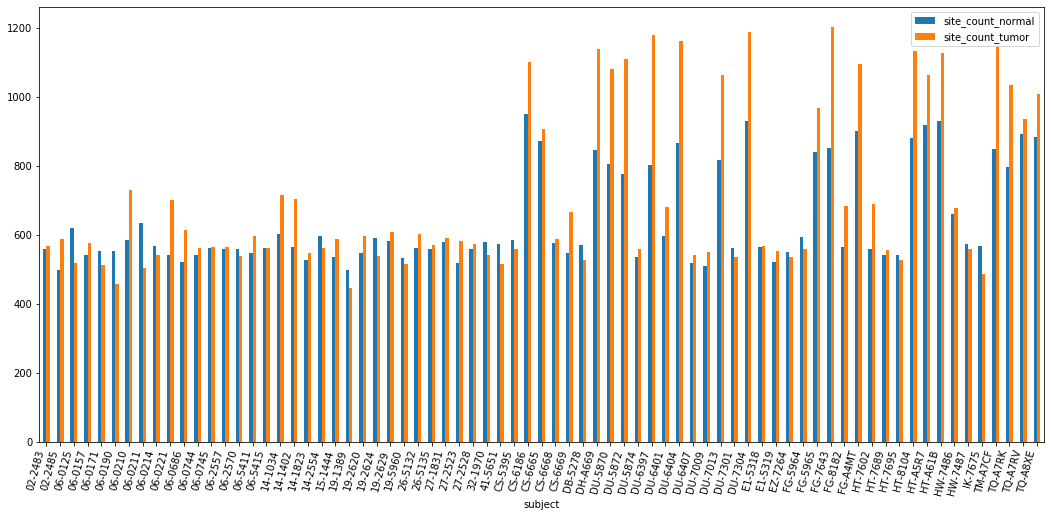

In [98]:
tmp.plot(kind='bar',y=['site_count_normal','site_count_tumor'])
plt.xticks(rotation=75,ha='right')
plt.show()

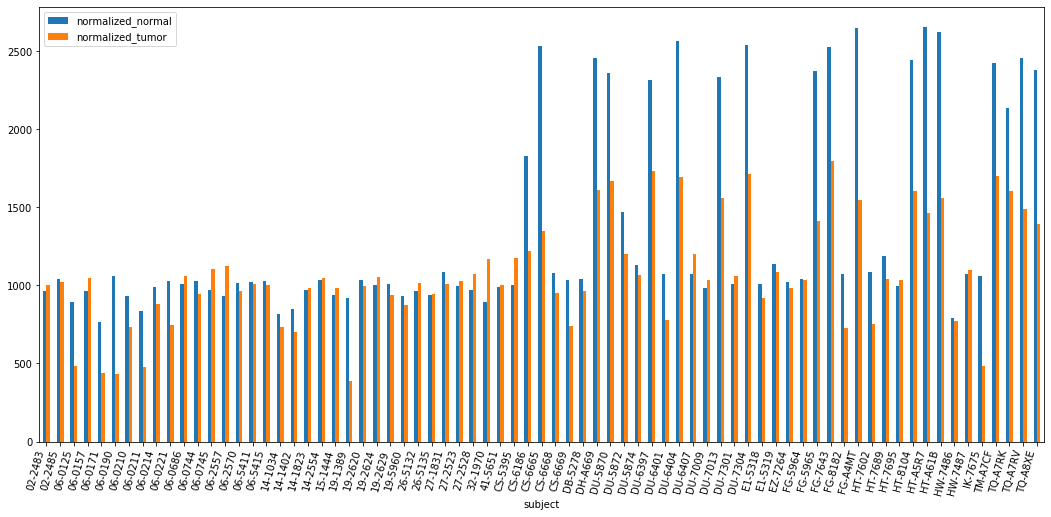

In [99]:
tmp.plot(kind='bar',y=['normalized_normal','normalized_tumor'])
plt.xticks(rotation=75,ha='right')
plt.show()

# Are read counts correlated to site counts?

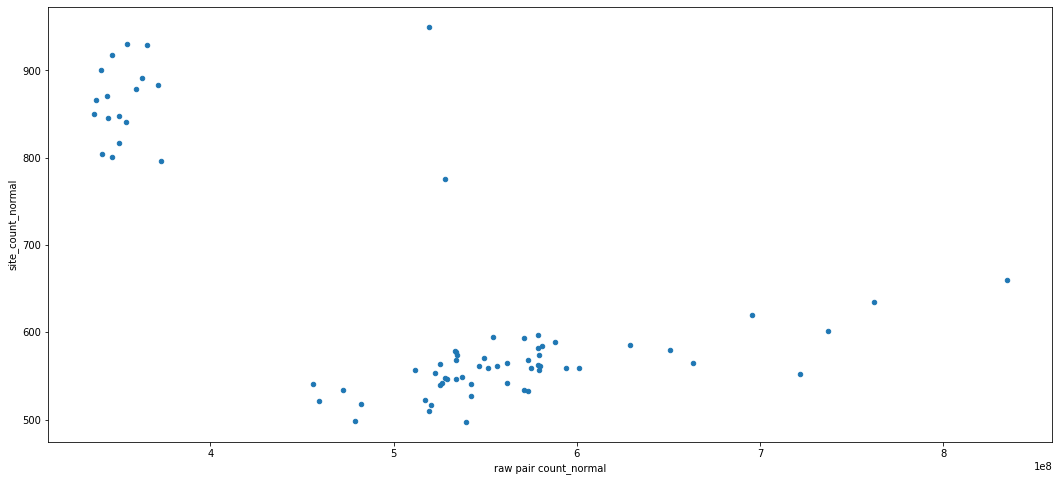

In [100]:
tmp.plot(kind='scatter',x='raw pair count_normal',y='site_count_normal')

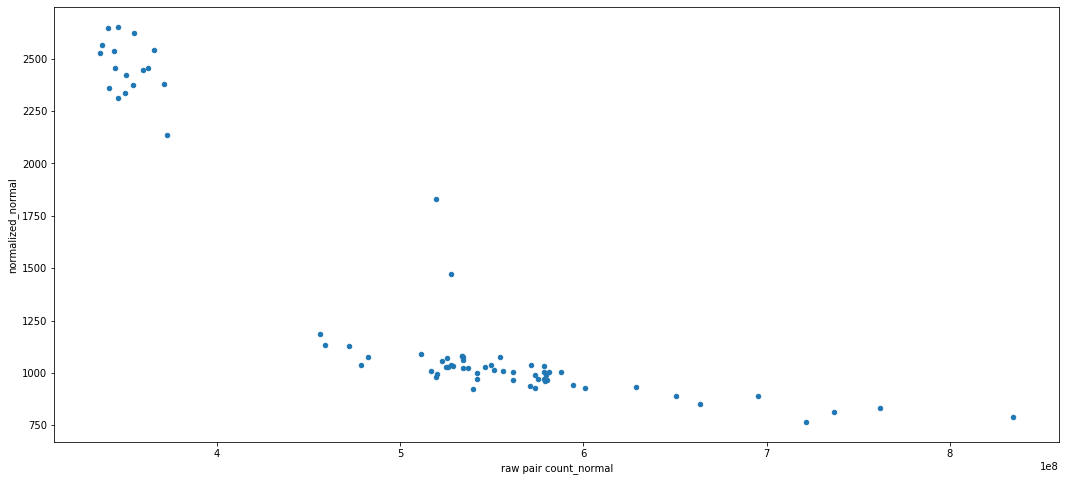

In [101]:
tmp.plot(kind='scatter',x='raw pair count_normal',y='normalized_normal')

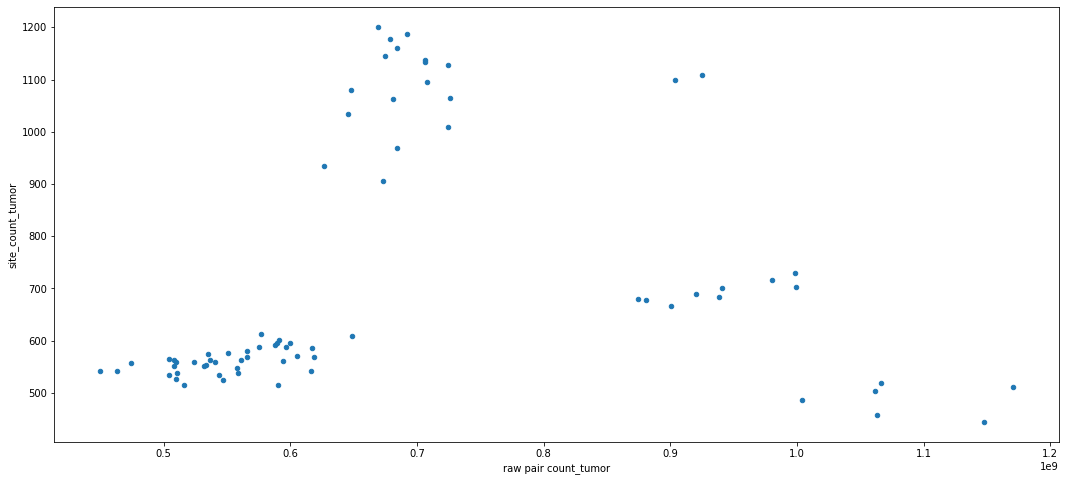

In [102]:
tmp.plot(kind='scatter',x='raw pair count_tumor',y='site_count_tumor')

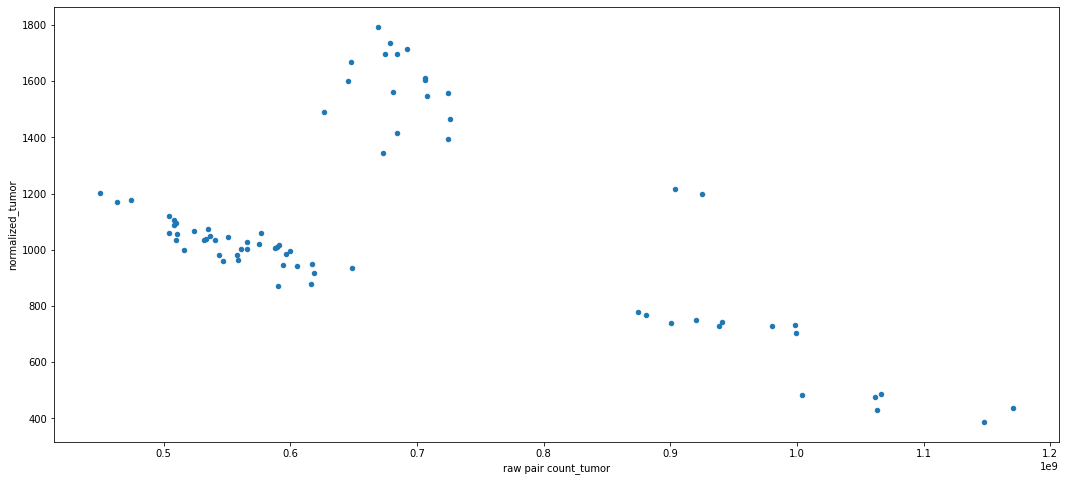

In [103]:
tmp.plot(kind='scatter',x='raw pair count_tumor',y='normalized_tumor')

# END tmp to compare previous plots

# How to compare the precise site presence in tumor / normal pairs?

# Add meta data?

In [104]:
#dftns=dftn.merge(c,left_index=True, right_index=True)
dftns=dftn.copy()

In [105]:
dftns.head()

chromosome        chr1                                                 \
position      1409000   1410000   1580000  1581000  3751000  5573000    
sample                                                                  
02-2483-01A   7.066832  1.766708  7.066832      0.0      0.0      0.0   
02-2483-10A   3.452418  5.178627  5.178627      0.0      0.0      0.0   
02-2485-01A   5.216842  6.955789  6.955789      0.0      0.0      0.0   
02-2485-10A  16.706656  0.000000  0.000000      0.0      0.0      0.0   
06-0125-01A   8.440648  5.627099  8.440648      0.0      0.0      0.0   

chromosome                                       ...      chrY            \
position    6304000  8502000  8912000  9001000   ...  12462000  12463000   
sample                                           ...                       
02-2483-01A      0.0      0.0      0.0      0.0  ...  1.766708  1.766708   
02-2483-10A      0.0      0.0      0.0      0.0  ...  0.000000  3.452418   
02-2485-01A      0.0      0.0      0.0      0.0  ...  1.738947  0.000000   
02-2485-10A      0.0      0.0      0.0      0.0  ...  0.000000  2.088332   
06-0125-01A      0.0      0.0      0.0      0.0  ...  0.000000  0.000000   

chromosome                                                               \
position    12879000  13103000   13104000  15774000  19699000  19700000   
sample                                                                    
02-2483-01A      0.0  0.000000   0.000000  0.000000  3.533416  0.000000   
02-2483-10A      0.0  0.000000   0.000000  1.726209  1.726209  1.726209   
02-2485-01A      0.0  0.000000   1.738947  0.000000  0.000000  1.738947   
02-2485-10A      0.0  2.088332  10.441660  0.000000  2.088332  0.000000   
06-0125-01A      0.0  0.000000   0.000000  0.000000  0.000000  0.000000   

chromosome                      
position    20552000  20976000  
sample                          
02-2483-01A      0.0  0.000000  
02-2483-10A      0.0  0.000000  
02-2485-01A      0.0  1.738947  
02-2485-10A      0.0  0.000000  
06-0125-01A      0.0  0.000000  

[5 rows x 2796 columns]

In [106]:
#dftns['subject']=dftns.index.levels[0].str[0:7]
dftns['subject']=dftns.index.str[0:7]

##test['subject']=test
##tmp['subjec']=tmp.apply(lambda row: 1e9*row['site_count']/row['raw pair count'], axis=1 )

In [107]:
dftns.set_index(['subject'], append=True,inplace=True)


In [108]:
dftns.head()

chromosome                chr1                                                 \
position              1409000   1410000   1580000  1581000  3751000  5573000    
sample      subject                                                             
02-2483-01A 02-2483   7.066832  1.766708  7.066832      0.0      0.0      0.0   
02-2483-10A 02-2483   3.452418  5.178627  5.178627      0.0      0.0      0.0   
02-2485-01A 02-2485   5.216842  6.955789  6.955789      0.0      0.0      0.0   
02-2485-10A 02-2485  16.706656  0.000000  0.000000      0.0      0.0      0.0   
06-0125-01A 06-0125   8.440648  5.627099  8.440648      0.0      0.0      0.0   

chromosome                                               ...      chrY  \
position            6304000  8502000  8912000  9001000   ...  12462000   
sample      subject                                      ...             
02-2483-01A 02-2483      0.0      0.0      0.0      0.0  ...  1.766708   
02-2483-10A 02-2483      0.0      0.0      0.0      0.0  ...  0.000000   
02-2485-01A 02-2485      0.0      0.0      0.0      0.0  ...  1.738947   
02-2485-10A 02-2485      0.0      0.0      0.0      0.0  ...  0.000000   
06-0125-01A 06-0125      0.0      0.0      0.0      0.0  ...  0.000000   

chromosome                                                             \
position             12463000 12879000  13103000   13104000  15774000   
sample      subject                                                     
02-2483-01A 02-2483  1.766708      0.0  0.000000   0.000000  0.000000   
02-2483-10A 02-2483  3.452418      0.0  0.000000   0.000000  1.726209   
02-2485-01A 02-2485  0.000000      0.0  0.000000   1.738947  0.000000   
02-2485-10A 02-2485  2.088332      0.0  2.088332  10.441660  0.000000   
06-0125-01A 06-0125  0.000000      0.0  0.000000   0.000000  0.000000   

chromosome                                                  
position             19699000  19700000 20552000  20976000  
sample      subject                                         
02-2483-01A 02-2483  3.533416  0.000000      0.0  0.000000  
02-2483-10A 02-2483  1.726209  1.726209      0.0  0.000000  
02-2485-01A 02-2485  0.000000  1.738947      0.0  1.738947  
02-2485-10A 02-2485  2.088332  0.000000      0.0  0.000000  
06-0125-01A 06-0125  0.000000  0.000000      0.0  0.000000  

[5 rows x 2796 columns]

In [109]:
#dftns=dftns.reorder_levels(['subject','sample','raw pair count'])
dftns=dftns.reorder_levels(['subject','sample'])

In [110]:
dftns.head()

chromosome                chr1                                                 \
position              1409000   1410000   1580000  1581000  3751000  5573000    
subject sample                                                                  
02-2483 02-2483-01A   7.066832  1.766708  7.066832      0.0      0.0      0.0   
        02-2483-10A   3.452418  5.178627  5.178627      0.0      0.0      0.0   
02-2485 02-2485-01A   5.216842  6.955789  6.955789      0.0      0.0      0.0   
        02-2485-10A  16.706656  0.000000  0.000000      0.0      0.0      0.0   
06-0125 06-0125-01A   8.440648  5.627099  8.440648      0.0      0.0      0.0   

chromosome                                               ...      chrY  \
position            6304000  8502000  8912000  9001000   ...  12462000   
subject sample                                           ...             
02-2483 02-2483-01A      0.0      0.0      0.0      0.0  ...  1.766708   
        02-2483-10A      0.0      0.0      0.0      0.0  ...  0.000000   
02-2485 02-2485-01A      0.0      0.0      0.0      0.0  ...  1.738947   
        02-2485-10A      0.0      0.0      0.0      0.0  ...  0.000000   
06-0125 06-0125-01A      0.0      0.0      0.0      0.0  ...  0.000000   

chromosome                                                             \
position             12463000 12879000  13103000   13104000  15774000   
subject sample                                                          
02-2483 02-2483-01A  1.766708      0.0  0.000000   0.000000  0.000000   
        02-2483-10A  3.452418      0.0  0.000000   0.000000  1.726209   
02-2485 02-2485-01A  0.000000      0.0  0.000000   1.738947  0.000000   
        02-2485-10A  2.088332      0.0  2.088332  10.441660  0.000000   
06-0125 06-0125-01A  0.000000      0.0  0.000000   0.000000  0.000000   

chromosome                                                  
position             19699000  19700000 20552000  20976000  
subject sample                                              
02-2483 02-2483-01A  3.533416  0.000000      0.0  0.000000  
        02-2483-10A  1.726209  1.726209      0.0  0.000000  
02-2485 02-2485-01A  0.000000  1.738947      0.0  1.738947  
        02-2485-10A  2.088332  0.000000      0.0  0.000000  
06-0125 06-0125-01A  0.000000  0.000000      0.0  0.000000  

[5 rows x 2796 columns]

In [111]:
dftns.columns

MultiIndex([('chr1',  1409000),
            ('chr1',  1410000),
            ('chr1',  1580000),
            ('chr1',  1581000),
            ('chr1',  3751000),
            ('chr1',  5573000),
            ('chr1',  6304000),
            ('chr1',  8502000),
            ('chr1',  8912000),
            ('chr1',  9001000),
            ...
            ('chrY', 12462000),
            ('chrY', 12463000),
            ('chrY', 12879000),
            ('chrY', 13103000),
            ('chrY', 13104000),
            ('chrY', 15774000),
            ('chrY', 19699000),
            ('chrY', 19700000),
            ('chrY', 20552000),
            ('chrY', 20976000)],
           names=['chromosome', 'position'], length=2796)

In [112]:
##dftns.loc['TQ-A8XE',0:,:]>0

##dftns.loc[idx['TQ-A8XE',1,:]]
##dftns.loc['TQ-A8XE'].index.get_level_values(0)[0]

#dftns.loc['TQ-A8XE',:,:]>0
dftns.loc['TQ-A8XE',:]>0

chromosome      chr1                                                        \
position    1409000  1410000  1580000  1581000  3751000  5573000  6304000    
sample                                                                       
TQ-A8XE-01A     True     True     True    False    False     True     True   
TQ-A8XE-10A     True     True     True    False     True     True    False   

chromosome                              ...     chrY                    \
position    8502000  8912000  9001000   ... 12462000 12463000 12879000   
sample                                  ...                              
TQ-A8XE-01A    False    False     True  ...    False    False    False   
TQ-A8XE-10A    False    False     True  ...    False    False    False   

chromosome                                                                  
position    13103000 13104000 15774000 19699000 19700000 20552000 20976000  
sample                                                                      
TQ-A8XE-01A    False    False    False    False    False    False    False  
TQ-A8XE-10A    False    False    False    False    False    False    False  

[2 rows x 2796 columns]

In [113]:
#dftns.loc['TQ-A8XE','TQ-A8XE-01A',:]>0
dftns.loc['TQ-A8XE','TQ-A8XE-01A']>0

chromosome  position
chr1        1409000      True
            1410000      True
            1580000      True
            1581000     False
            3751000     False
                        ...  
chrY        15774000    False
            19699000    False
            19700000    False
            20552000    False
            20976000    False
Name: (TQ-A8XE, TQ-A8XE-01A), Length: 2796, dtype: bool

In [114]:
#dftns.loc['TQ-A8XE','TQ-A8XE-10A',:]>0
dftns.loc['TQ-A8XE','TQ-A8XE-10A']>0

chromosome  position
chr1        1409000      True
            1410000      True
            1580000      True
            1581000     False
            3751000      True
                        ...  
chrY        15774000    False
            19699000    False
            19700000    False
            20552000    False
            20976000    False
Name: (TQ-A8XE, TQ-A8XE-10A), Length: 2796, dtype: bool

# OR

In [115]:
#(dftns.loc['TQ-A8XE','TQ-A8XE-01A',724443745]>0)|(dftns.loc['TQ-A8XE','TQ-A8XE-10A',:]>0)

(dftns.loc['TQ-A8XE','TQ-A8XE-01A']>0)|(dftns.loc['TQ-A8XE','TQ-A8XE-10A']>0)


chromosome  position
chr1        1409000      True
            1410000      True
            1580000      True
            1581000     False
            3751000      True
                        ...  
chrY        15774000    False
            19699000    False
            19700000    False
            20552000    False
            20976000    False
Length: 2796, dtype: bool

# AND

In [116]:
(dftns.loc['TQ-A8XE','TQ-A8XE-01A']>0)&(dftns.loc['TQ-A8XE','TQ-A8XE-10A']>0)


chromosome  position
chr1        1409000      True
            1410000      True
            1580000      True
            1581000     False
            3751000     False
                        ...  
chrY        15774000    False
            19699000    False
            19700000    False
            20552000    False
            20976000    False
Length: 2796, dtype: bool

# A XOR B ( means only A or B, never both )

In [117]:
(dftns.loc['TQ-A8XE','TQ-A8XE-01A']>0)^(dftns.loc['TQ-A8XE','TQ-A8XE-10A']>0)


chromosome  position
chr1        1409000     False
            1410000     False
            1580000     False
            1581000     False
            3751000      True
                        ...  
chrY        15774000    False
            19699000    False
            19700000    False
            20552000    False
            20976000    False
Length: 2796, dtype: bool

# ( A XOR B ) AND A ( means only A )

# ( A XOR B ) AND B ( means only B )


In [118]:
((dftns.loc['TQ-A8XE','TQ-A8XE-01A']>0)^(dftns.loc['TQ-A8XE','TQ-A8XE-10A']>0))&(dftns.loc['TQ-A8XE','TQ-A8XE-01A']>0)


chromosome  position
chr1        1409000     False
            1410000     False
            1580000     False
            1581000     False
            3751000     False
                        ...  
chrY        15774000    False
            19699000    False
            19700000    False
            20552000    False
            20976000    False
Length: 2796, dtype: bool

In [119]:
((dftns.loc['TQ-A8XE','TQ-A8XE-01A']>0)^(dftns.loc['TQ-A8XE','TQ-A8XE-10A']>0))&(dftns.loc['TQ-A8XE','TQ-A8XE-10A']>0)


chromosome  position
chr1        1409000     False
            1410000     False
            1580000     False
            1581000     False
            3751000      True
                        ...  
chrY        15774000    False
            19699000    False
            19700000    False
            20552000    False
            20976000    False
Length: 2796, dtype: bool

In [120]:
(((dftns.loc['TQ-A8XE','TQ-A8XE-01A']>0)^(dftns.loc['TQ-A8XE','TQ-A8XE-10A']>0))&(dftns.loc['TQ-A8XE','TQ-A8XE-01A']>0)).sum()


367

In [121]:
(((dftns.loc['TQ-A8XE','TQ-A8XE-01A']>0)^(dftns.loc['TQ-A8XE','TQ-A8XE-10A']>0))&(dftns.loc['TQ-A8XE','TQ-A8XE-10A']>0)).sum()


241

In [122]:
dftns.loc['TQ-A8XE'].iloc[0]

chromosome  position
chr1        1409000     6.901847
            1410000     6.901847
            1580000     2.760739
            1581000     0.000000
            3751000     0.000000
                          ...   
chrY        15774000    0.000000
            19699000    0.000000
            19700000    0.000000
            20552000    0.000000
            20976000    0.000000
Name: TQ-A8XE-01A, Length: 2796, dtype: float64

In [123]:
dftns.loc['TQ-A8XE'].iloc[1]

chromosome  position
chr1        1409000     16.156597
            1410000     10.771065
            1580000     16.156597
            1581000      0.000000
            3751000      2.692766
                          ...    
chrY        15774000     0.000000
            19699000     0.000000
            19700000     0.000000
            20552000     0.000000
            20976000     0.000000
Name: TQ-A8XE-10A, Length: 2796, dtype: float64

In [124]:
dftns.index.levels[0]

Index(['02-2483', '02-2485', '06-0125', '06-0157', '06-0171', '06-0190',
       '06-0210', '06-0211', '06-0214', '06-0221', '06-0686', '06-0744',
       '06-0745', '06-2557', '06-2570', '06-5411', '06-5415', '14-1034',
       '14-1402', '14-1823', '14-2554', '15-1444', '19-1389', '19-2620',
       '19-2624', '19-2629', '19-5960', '26-5132', '26-5135', '27-1831',
       '27-2523', '27-2528', '32-1970', '41-5651', 'CS-5395', 'CS-6186',
       'CS-6665', 'CS-6668', 'CS-6669', 'DB-5278', 'DH-A669', 'DU-5870',
       'DU-5872', 'DU-5874', 'DU-6397', 'DU-6401', 'DU-6404', 'DU-6407',
       'DU-7009', 'DU-7013', 'DU-7301', 'DU-7304', 'E1-5318', 'E1-5319',
       'EZ-7264', 'FG-5964', 'FG-5965', 'FG-7643', 'FG-8182', 'FG-A4MT',
       'HT-7602', 'HT-7689', 'HT-7695', 'HT-8104', 'HT-A5R7', 'HT-A61B',
       'HW-7486', 'HW-7487', 'IK-7675', 'TM-A7CF', 'TQ-A7RK', 'TQ-A7RV',
       'TQ-A8XE'],
      dtype='object', name='subject')

In [125]:
dftns.index.get_level_values(0)

Index(['02-2483', '02-2483', '02-2485', '02-2485', '06-0125', '06-0125',
       '06-0157', '06-0157', '06-0171', '06-0171',
       ...
       'IK-7675', 'IK-7675', 'TM-A7CF', 'TM-A7CF', 'TQ-A7RK', 'TQ-A7RK',
       'TQ-A7RV', 'TQ-A7RV', 'TQ-A8XE', 'TQ-A8XE'],
      dtype='object', name='subject', length=146)

In [126]:
(dftns.loc['TQ-A8XE'].iloc[0]>0).sum()

1009

In [127]:
#np.set_printoptions(threshold=np.inf)

In [128]:
dftns.loc['TQ-A8XE'].iloc[0].values

array([6.90184715, 6.90184715, 2.76073886, ..., 0.        , 0.        ,
       0.        ])

In [129]:
#np.set_printoptions(threshold=1000)

In [130]:
max_rows=pd.get_option('display.max_rows')

In [131]:
#pd.set_option('display.max_rows', None)

In [132]:
dftns.head()

chromosome                chr1                                                 \
position              1409000   1410000   1580000  1581000  3751000  5573000    
subject sample                                                                  
02-2483 02-2483-01A   7.066832  1.766708  7.066832      0.0      0.0      0.0   
        02-2483-10A   3.452418  5.178627  5.178627      0.0      0.0      0.0   
02-2485 02-2485-01A   5.216842  6.955789  6.955789      0.0      0.0      0.0   
        02-2485-10A  16.706656  0.000000  0.000000      0.0      0.0      0.0   
06-0125 06-0125-01A   8.440648  5.627099  8.440648      0.0      0.0      0.0   

chromosome                                               ...      chrY  \
position            6304000  8502000  8912000  9001000   ...  12462000   
subject sample                                           ...             
02-2483 02-2483-01A      0.0      0.0      0.0      0.0  ...  1.766708   
        02-2483-10A      0.0      0.0      0.0      0.0  ...  0.000000   
02-2485 02-2485-01A      0.0      0.0      0.0      0.0  ...  1.738947   
        02-2485-10A      0.0      0.0      0.0      0.0  ...  0.000000   
06-0125 06-0125-01A      0.0      0.0      0.0      0.0  ...  0.000000   

chromosome                                                             \
position             12463000 12879000  13103000   13104000  15774000   
subject sample                                                          
02-2483 02-2483-01A  1.766708      0.0  0.000000   0.000000  0.000000   
        02-2483-10A  3.452418      0.0  0.000000   0.000000  1.726209   
02-2485 02-2485-01A  0.000000      0.0  0.000000   1.738947  0.000000   
        02-2485-10A  2.088332      0.0  2.088332  10.441660  0.000000   
06-0125 06-0125-01A  0.000000      0.0  0.000000   0.000000  0.000000   

chromosome                                                  
position             19699000  19700000 20552000  20976000  
subject sample                                              
02-2483 02-2483-01A  3.533416  0.000000      0.0  0.000000  
        02-2483-10A  1.726209  1.726209      0.0  0.000000  
02-2485 02-2485-01A  0.000000  1.738947      0.0  1.738947  
        02-2485-10A  2.088332  0.000000      0.0  0.000000  
06-0125 06-0125-01A  0.000000  0.000000      0.0  0.000000  

[5 rows x 2796 columns]

In [133]:
#pd.DataFrame(df[(df['diff']>10) | (df['diff']<-10)].index)

In [134]:
pd.set_option('display.max_rows', max_rows)

In [135]:
stn=pd.DataFrame(columns=['subject','uniq tumor','uniq normal'])
stn.set_index('subject',inplace=True)

sstu=pd.DataFrame(columns=['subject','sample','tn','uniq'])
sstu.set_index(['subject','sample','tn'],inplace=True)


In [136]:
for i in dftns.index.levels[0]:
    stn.loc[i]=((((dftns.loc[i].iloc[0]>0)^(dftns.loc[i].iloc[1]>0))&(dftns.loc[i].iloc[0]>0)).sum(),
               (((dftns.loc[i].iloc[0]>0)^(dftns.loc[i].iloc[1]>0))&(dftns.loc[i].iloc[1]>0)).sum())
    sstu.loc[(i,dftns.loc[i].iloc[0].name, 'tumor'),:]=(
        ((dftns.loc[i].iloc[0]>0)^(dftns.loc[i].iloc[1]>0))&(dftns.loc[i].iloc[0]>0)).sum()
    sstu.loc[(i,dftns.loc[i].iloc[1].name,'normal'),:]=(
        ((dftns.loc[i].iloc[0]>0)^(dftns.loc[i].iloc[1]>0))&(dftns.loc[i].iloc[1]>0)).sum()

# Plot tries to parse the subject ids into dates because they are ##-####
# I can't figure out how to stop it.
#    abctn.loc[("_"+i,dftns.loc[i].iloc[0].name, 'tumor'),:]=(
#((dftns.loc[i].iloc[0]>0)^(dftns.loc[i].iloc[1]>0))&(dftns.loc[i].iloc[0]>0)).sum()
#    abctn.loc[("_"+i,dftns.loc[i].iloc[1].name,'normal'),:]=(
#((dftns.loc[i].iloc[0]>0)^(dftns.loc[i].iloc[1]>0))&(dftns.loc[i].iloc[1]>0)).sum()
    

In [137]:
dftns.loc['02-2483'].iloc[1].name

'02-2483-10A'

In [138]:
stn

,uniq tumor,uniq normal
subject,,
02-2483,180,169
02-2485,218,129
06-0125,223,109
06-0157,176,141
06-0171,265,67
...,...,...
IK-7675,218,91
TM-A7CF,480,183
TQ-A7RK,419,181


In [139]:
sstu

uniq
subject sample      tn         
02-2483 02-2483-01A tumor   180
        02-2483-10A normal  169
02-2485 02-2485-01A tumor   218
        02-2485-10A normal  129
06-0125 06-0125-01A tumor   223
...                         ...
TQ-A7RK TQ-A7RK-10A normal  181
TQ-A7RV TQ-A7RV-01A tumor   314
        TQ-A7RV-10A normal  271
TQ-A8XE TQ-A8XE-01A tumor   367
        TQ-A8XE-10A normal  241

[146 rows x 1 columns]

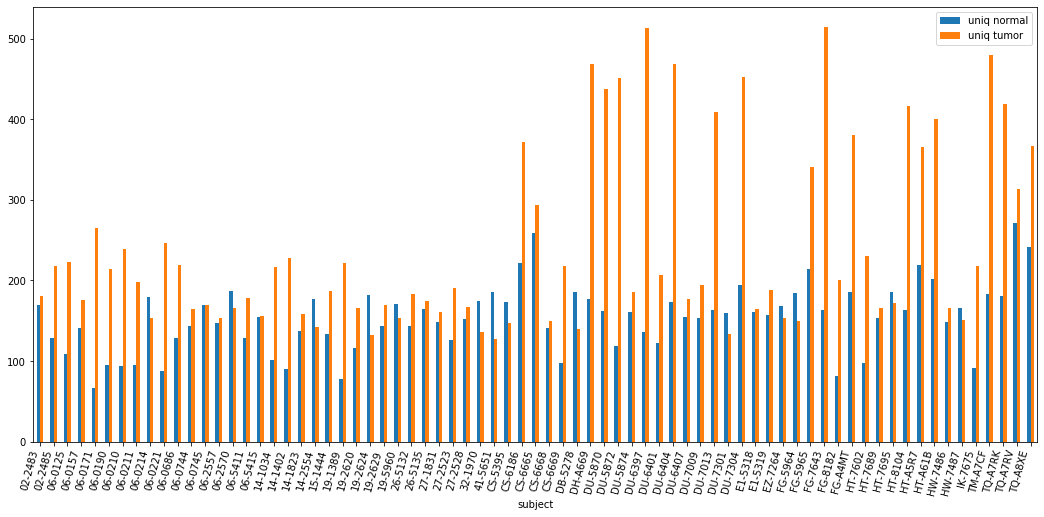

In [140]:
stn.plot(kind='bar',y=['uniq normal','uniq tumor'])
plt.xticks(rotation=75,ha='right')
plt.show()

In [141]:
sstu.head()

uniq
subject sample      tn         
02-2483 02-2483-01A tumor   180
        02-2483-10A normal  169
02-2485 02-2485-01A tumor   218
        02-2485-10A normal  129
06-0125 06-0125-01A tumor   223

In [142]:
sstu.reset_index(inplace=True)

In [143]:
sstu.head()

,subject,sample,tn,uniq
0,02-2483,02-2483-01A,tumor,180
1,02-2483,02-2483-10A,normal,169
2,02-2485,02-2485-01A,tumor,218
3,02-2485,02-2485-10A,normal,129
4,06-0125,06-0125-01A,tumor,223


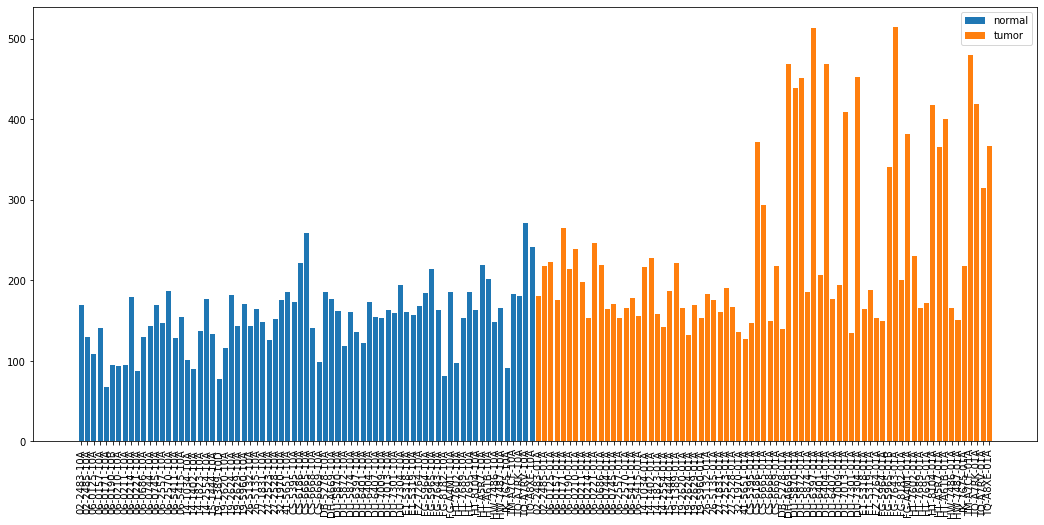

In [144]:
groups = sstu.groupby('tn')
fig, ax = plt.subplots()
plt.xticks(rotation=90)
for name, group in groups:
    ax.bar(group['sample'],group['uniq'], label=name)
#    ax.bar(group['subject'],group['uniq'], label=name)
ax.legend()
plt.show()

In [145]:
meta.head()

,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,subject,days_to_death,gender1,disease_type,center_name
0,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,Methylated,63.0,47.573895,1.0,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,NaN,68.0,12.320588,1.0,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,NaN,63.0,3.186925,1.0,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [146]:
sstum=sstu.merge(meta,on='subject')

In [147]:
sstum.head()

,subject,sample,tn,uniq,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,...,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name
0,02-2483,02-2483-01A,tumor,180,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,...,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2483,02-2483-10A,normal,169,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,...,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,02-2485,02-2485-01A,tumor,218,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,...,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,02-2485,02-2485-10A,normal,129,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,...,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0125,06-0125-01A,tumor,223,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,...,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.573895,1.0,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


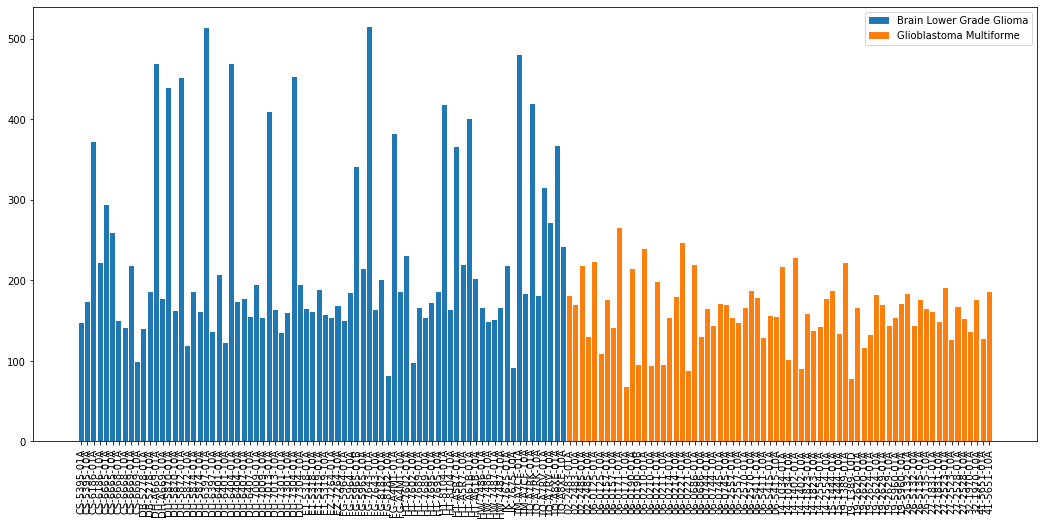

In [148]:
groups = sstum.groupby('disease_type')
fig, ax = plt.subplots()
plt.xticks(rotation=90)
for name, group in groups:
    ax.bar(group['sample'],group['uniq'], label=name)
ax.legend()
plt.show()

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


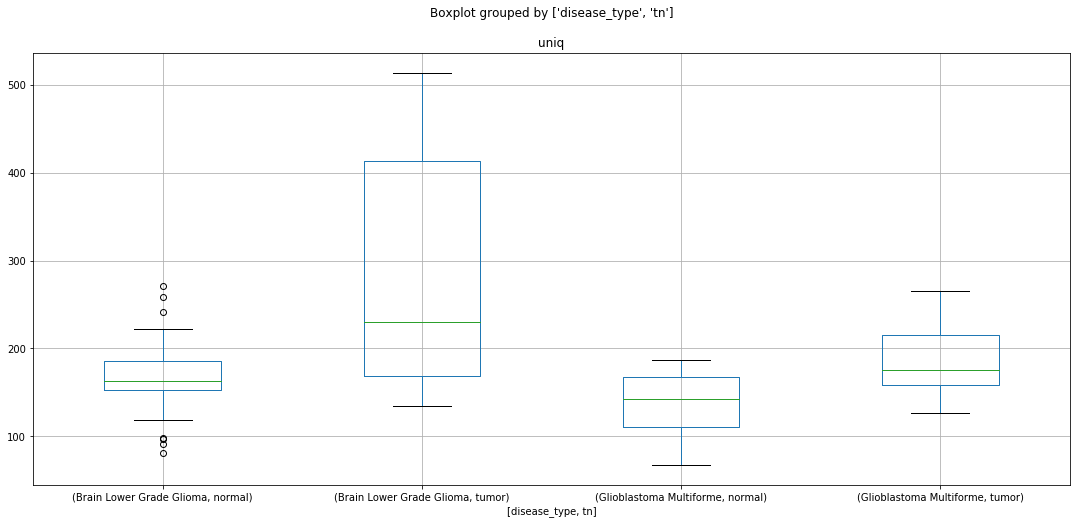

In [149]:
sstum.boxplot(column='uniq',
    by=['disease_type','tn'])

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


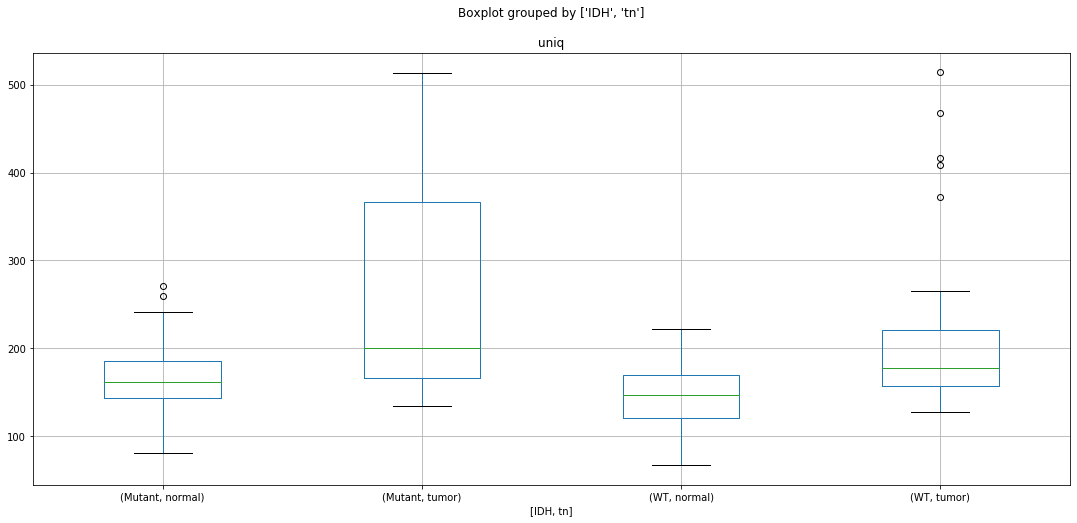

In [150]:
sstum.boxplot(column='uniq',
    by=['IDH','tn'])

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


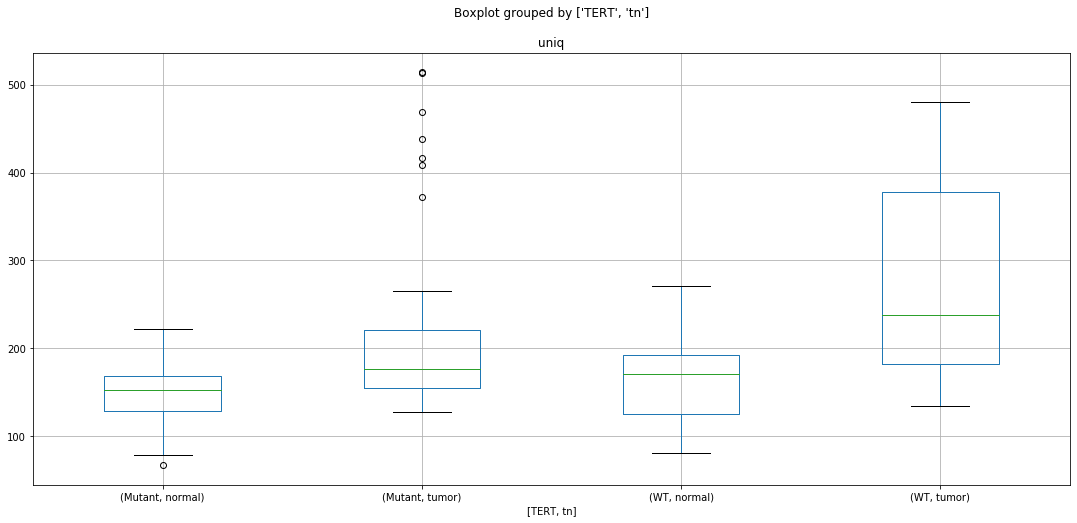

In [151]:
sstum.boxplot(column='uniq',
    by=['TERT','tn'])

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


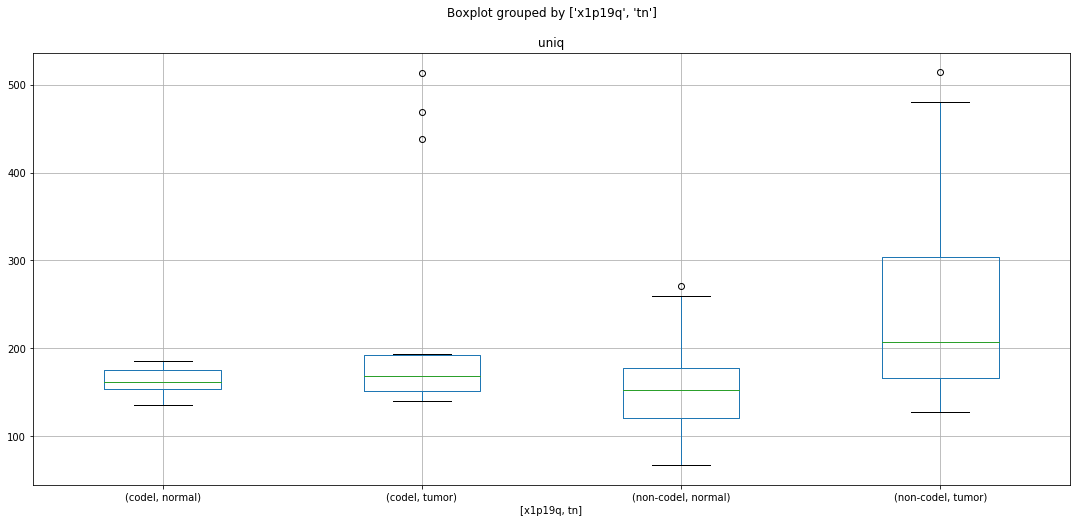

In [152]:
sstum.boxplot(column='uniq',
    by=['x1p19q','tn'])

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


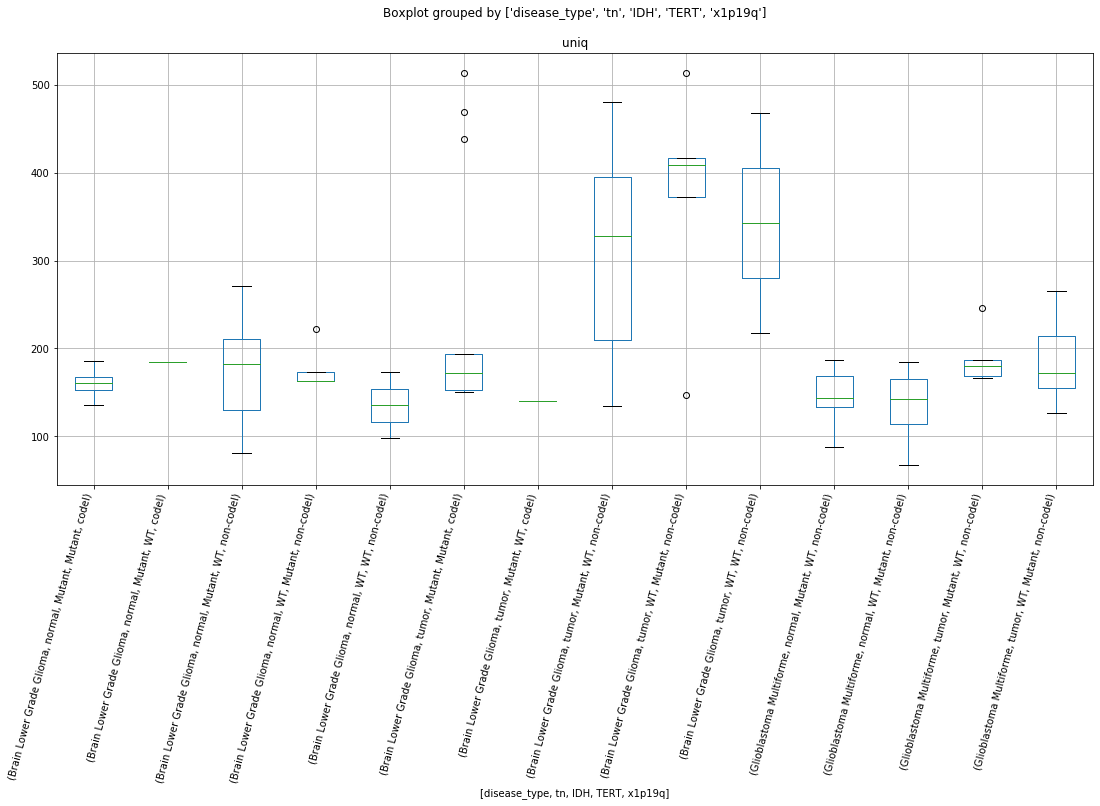

In [153]:
sstum.boxplot(column='uniq',
    by=['disease_type','tn','IDH','TERT','x1p19q'])
plt.xticks(rotation=75,ha='right')
plt.show()

In [154]:
sstum.set_index(['subject','sample','tn'],inplace=True)

In [155]:
sstum.head()

uniq project_id primary_diagnosis  \
subject sample      tn                                         
02-2483 02-2483-01A tumor   180   TCGA-GBM      Glioblastoma   
        02-2483-10A normal  169   TCGA-GBM      Glioblastoma   
02-2485 02-2485-01A tumor   218   TCGA-GBM      Glioblastoma   
        02-2485-10A normal  129   TCGA-GBM      Glioblastoma   
06-0125 06-0125-01A tumor   223   TCGA-GBM      Glioblastoma   

                                                 race               ethnicity  \
subject sample      tn                                                          
02-2483 02-2483-01A tumor                       asian  not hispanic or latino   
        02-2483-10A normal                      asian  not hispanic or latino   
02-2485 02-2485-01A tumor   black or african american  not hispanic or latino   
        02-2485-10A normal  black or african american  not hispanic or latino   
06-0125 06-0125-01A tumor                       white  not hispanic or latino   

                           gender2                   RE_names     IDH  \
subject sample      tn                                                  
02-2483 02-2483-01A tumor     male  02-2483-01A-01R-1849-01+1  Mutant   
        02-2483-10A normal    male  02-2483-01A-01R-1849-01+1  Mutant   
02-2485 02-2485-01A tumor     male  02-2485-01A-01R-1849-01+1      WT   
        02-2485-10A normal    male  02-2485-01A-01R-1849-01+1      WT   
06-0125 06-0125-01A tumor   female  06-0125-01A-01R-1849-01+1      WT   

                               x1p19q    TERT  ...  \
subject sample      tn                         ...   
02-2483 02-2483-01A tumor   non-codel      WT  ...   
        02-2483-10A normal  non-codel      WT  ...   
02-2485 02-2485-01A tumor   non-codel  Mutant  ...   
        02-2485-10A normal  non-codel  Mutant  ...   
06-0125 06-0125-01A tumor   non-codel  Mutant  ...   

                                                  Triple_group  \
subject sample      tn                                           
02-2483 02-2483-01A tumor   IDH-Mutant:1p19q-non-codel:TERT-WT   
        02-2483-10A normal  IDH-Mutant:1p19q-non-codel:TERT-WT   
02-2485 02-2485-01A tumor   IDH-WT:1p19q-non-codel:TERT-Mutant   
        02-2485-10A normal  IDH-WT:1p19q-non-codel:TERT-Mutant   
06-0125 06-0125-01A tumor   IDH-WT:1p19q-non-codel:TERT-Mutant   

                               Tissue_sample_location          MGMT   Age  \
subject sample      tn                                                      
02-2483 02-2483-01A tumor   MD Anderson Cancer Center    Methylated  43.0   
        02-2483-10A normal  MD Anderson Cancer Center    Methylated  43.0   
02-2485 02-2485-01A tumor   MD Anderson Cancer Center  Unmethylated  53.0   
        02-2485-10A normal  MD Anderson Cancer Center  Unmethylated  53.0   
06-0125 06-0125-01A tumor         Henry Ford Hospital    Methylated  63.0   

                           Survival_months  Vital_status  days_to_death  \
subject sample      tn                                                    
02-2483 02-2483-01A tumor        15.310383           0.0            NaN   
        02-2483-10A normal       15.310383           0.0            NaN   
02-2485 02-2485-01A tumor        15.441803           0.0            NaN   
        02-2485-10A normal       15.441803           0.0            NaN   
06-0125 06-0125-01A tumor        47.573895           1.0         1448.0   

                            gender1             disease_type  \
subject sample      tn                                         
02-2483 02-2483-01A tumor      male  Glioblastoma Multiforme   
        02-2483-10A normal     male  Glioblastoma Multiforme   
02-2485 02-2485-01A tumor      male  Glioblastoma Multiforme   
        02-2485-10A normal     male  Glioblastoma Multiforme   
06-0125 06-0125-01A tumor    female  Glioblastoma Multiforme   

                                                   center_name  
subject sample      tn                                          
02-2483 02-

# Simple sample / tumor count / normal count / disease type plots

In [156]:
stnm=stn.merge(meta,left_index=True,right_on='subject')

In [157]:
stnm.set_index('subject',inplace=True)

In [158]:
stnm.index

Index(['02-2483', '02-2485', '06-0125', '06-0157', '06-0171', '06-0190',
       '06-0210', '06-0211', '06-0214', '06-0221', '06-0686', '06-0744',
       '06-0745', '06-2557', '06-2570', '06-5411', '06-5415', '14-1034',
       '14-1402', '14-1823', '14-2554', '15-1444', '19-1389', '19-2620',
       '19-2624', '19-2629', '19-5960', '26-5132', '26-5135', '27-1831',
       '27-2523', '27-2528', '32-1970', '41-5651', 'CS-5395', 'CS-6186',
       'CS-6665', 'CS-6668', 'CS-6669', 'DB-5278', 'DH-A669', 'DU-5870',
       'DU-5872', 'DU-5874', 'DU-6397', 'DU-6401', 'DU-6404', 'DU-6407',
       'DU-7009', 'DU-7013', 'DU-7301', 'DU-7304', 'E1-5318', 'E1-5319',
       'EZ-7264', 'FG-5964', 'FG-5965', 'FG-7643', 'FG-8182', 'FG-A4MT',
       'HT-7602', 'HT-7689', 'HT-7695', 'HT-8104', 'HT-A5R7', 'HT-A61B',
       'HW-7486', 'HW-7487', 'IK-7675', 'TM-A7CF', 'TQ-A7RK', 'TQ-A7RV',
       'TQ-A8XE'],
      dtype='object', name='subject')

In [159]:
stnm.head()

,uniq tumor,uniq normal,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,...,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,180,169,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,...,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
02-2485,218,129,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,...,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
06-0125,223,109,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,...,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.573895,1.0,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
06-0157,176,141,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,...,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,63.0,3.186925,1.0,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
06-0171,265,67,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,...,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,65.0,13.109105,1.0,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


disease_type
Brain Lower Grade Glioma    AxesSubplot(0.125,0.125;0.775x0.755)
Glioblastoma Multiforme     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

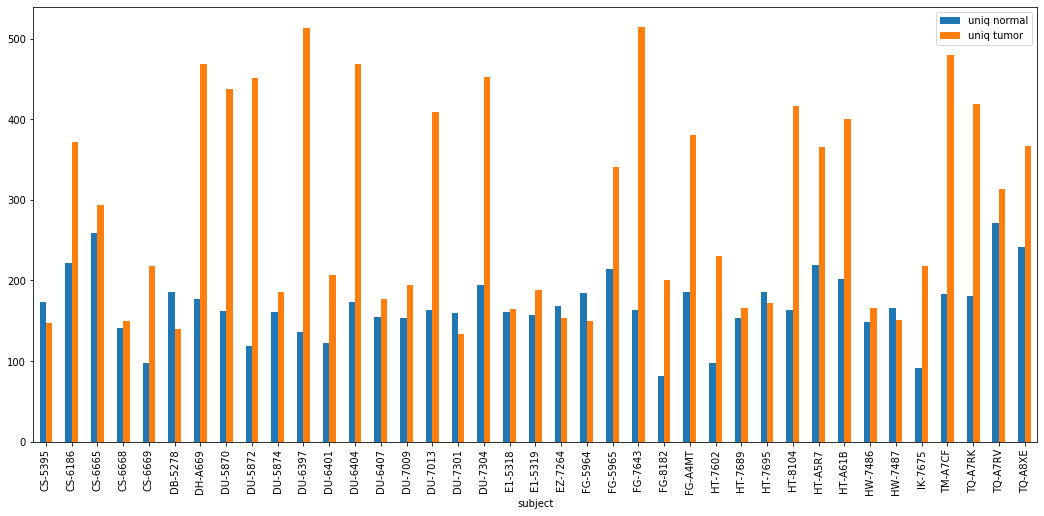

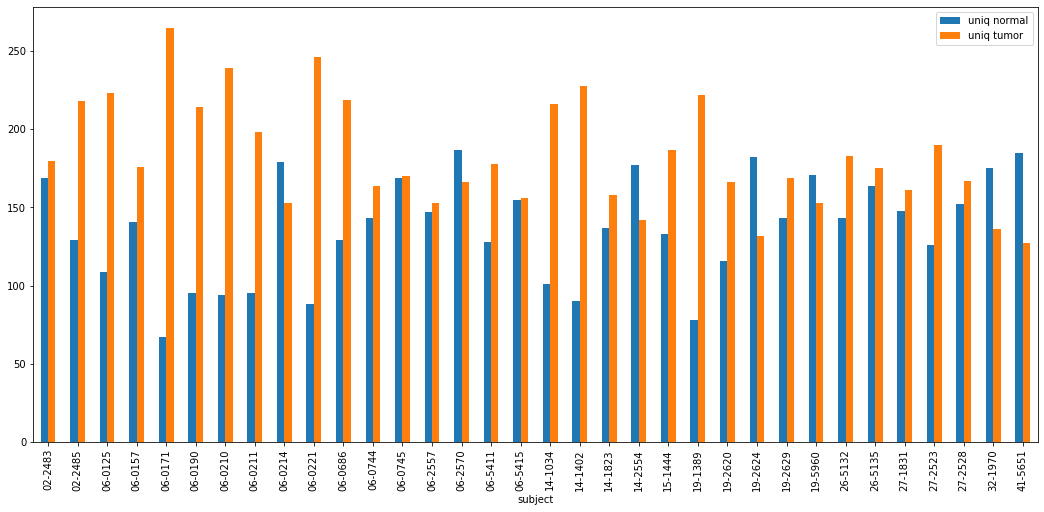

In [160]:
stnm.groupby('disease_type').plot(kind='bar',y=['uniq normal','uniq tumor'])


# END Simple sample / tumor count / normal count / disease type plots

In [161]:
#sstu.reset_index(inplace=True)
#sstu.head()

In [162]:
#sstum=sstu.merge(meta,on='subject')

In [163]:
#sstum.head()

# Transpose again

In [164]:
dftnt=dftn.T

In [165]:
dftnt.head()

sample               02-2483-01A  02-2483-10A  02-2485-01A  02-2485-10A  \
chromosome position                                                       
chr1       1409000      7.066832     3.452418     5.216842    16.706656   
           1410000      1.766708     5.178627     6.955789     0.000000   
           1580000      7.066832     5.178627     6.955789     0.000000   
           1581000      0.000000     0.000000     0.000000     0.000000   
           3751000      0.000000     0.000000     0.000000     0.000000   

sample               06-0125-01A  06-0125-10A  06-0157-01A  06-0157-10A  \
chromosome position                                                       
chr1       1409000      8.440648     4.314203     1.814758     1.780383   
           1410000      5.627099     1.438068     1.814758     0.000000   
           1580000      8.440648     7.190339     1.814758     7.121533   
           1581000      0.000000     0.000000     0.000000     0.000000   
           3751000      0.000000     0.000000     0.000000     0.000000   

sample               06-0171-01A  06-0171-10A  ...  IK-7675-01A  IK-7675-10A  \
chromosome position                            ...                             
chr1       1409000      2.562820     6.929330  ...     0.995888     3.743367   
           1410000      1.708547     2.771732  ...     3.983551     7.486735   
           1580000      3.417094     0.000000  ...     5.975327     5.615051   
           1581000      0.000000     0.000000  ...     0.000000     0.000000   
           3751000      0.000000     0.000000  ...     0.000000     0.000000   

sample               TM-A7CF-01A  TM-A7CF-10A  TQ-A7RK-01A  TQ-A7RK-10A  \
chromosome position                                                       
chr1       1409000      17.78652    14.274727    15.492079    13.408402   
           1410000       7.41105    11.419782     9.295248     0.000000   
           1580000      14.82210    11.419782    18.590495    13.408402   
           1581000       0.00000     0.000000     0.000000     0.000000   
           3751000       0.00000     2.854945     0.000000     0.000000   

sample               TQ-A7RV-01A  TQ-A7RV-10A  TQ-A8XE-01A  TQ-A8XE-10A  
chromosome position                                                      
chr1       1409000      9.574553    11.031846     6.901847    16.156597  
           1410000      4.787276     5.515923     6.901847    10.771065  
           1580000      9.574553    19.305730     2.760739    16.156597  
           1581000      0.000000     0.000000     0.000000     0.000000  
           3751000      0.000000     0.000000     0.000000     2.692766  

[5 rows x 146 columns]

# Number of sites for each subject

In [166]:
dftnt['normal_count']=dftnt.loc[:,
    dftnt.columns.str.match('.*-10.$')][ dftnt.loc[:,dftnt.columns.str.match('.*-10.$')]>1 ].count(axis=1)

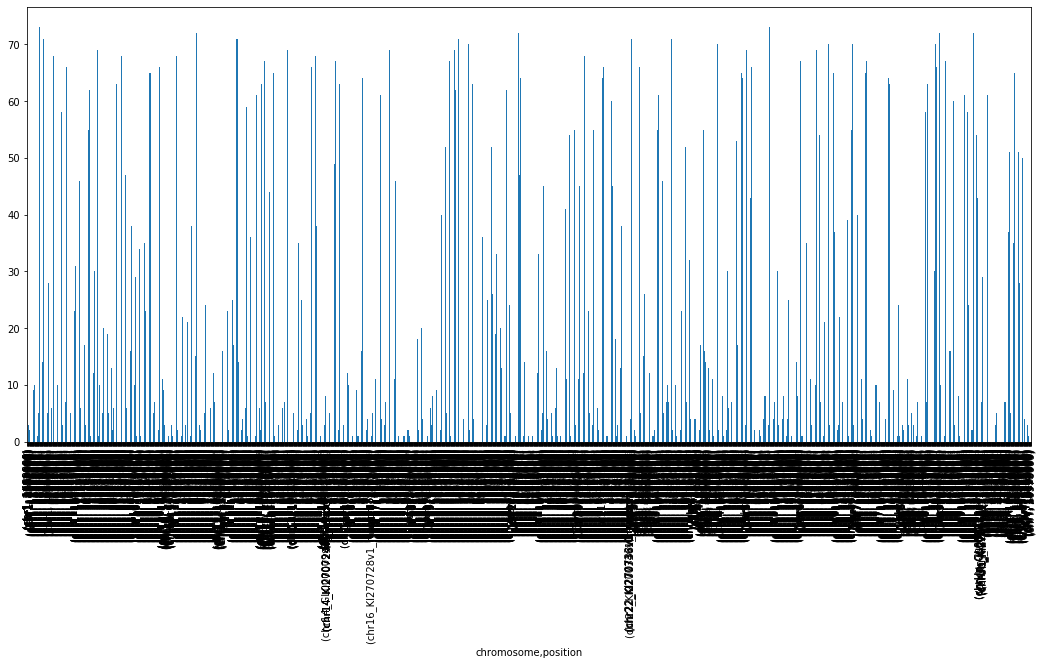

In [167]:
dftnt['normal_count'].plot(kind='bar')

In [168]:
dftnt['tumor_count']=dftnt.loc[:,
    dftnt.columns.str.match('.*-01.$')][ dftnt.loc[:,dftnt.columns.str.match('.*-01.$')]>1 ].count(axis=1)

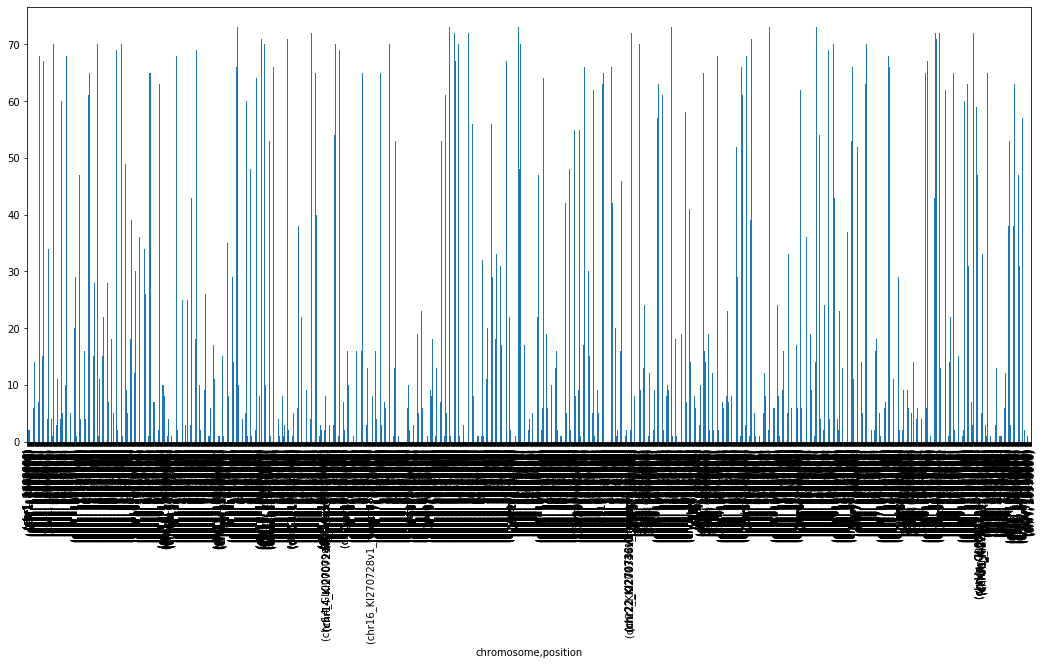

In [169]:
dftnt['tumor_count'].plot(kind='bar')

# Diff is normal - tumor. Negative means more in tumor.

In [170]:
dftnt['diff']=dftnt['normal_count']-dftnt['tumor_count']

In [171]:
dftnt['diff']

chromosome  position
chr1        1409000     5
            1410000    -4
            1580000     1
            1581000     0
            3751000     1
                       ..
chrY        15774000    3
            19699000   -1
            19700000   -1
            20552000    2
            20976000   -1
Name: diff, Length: 2796, dtype: int64

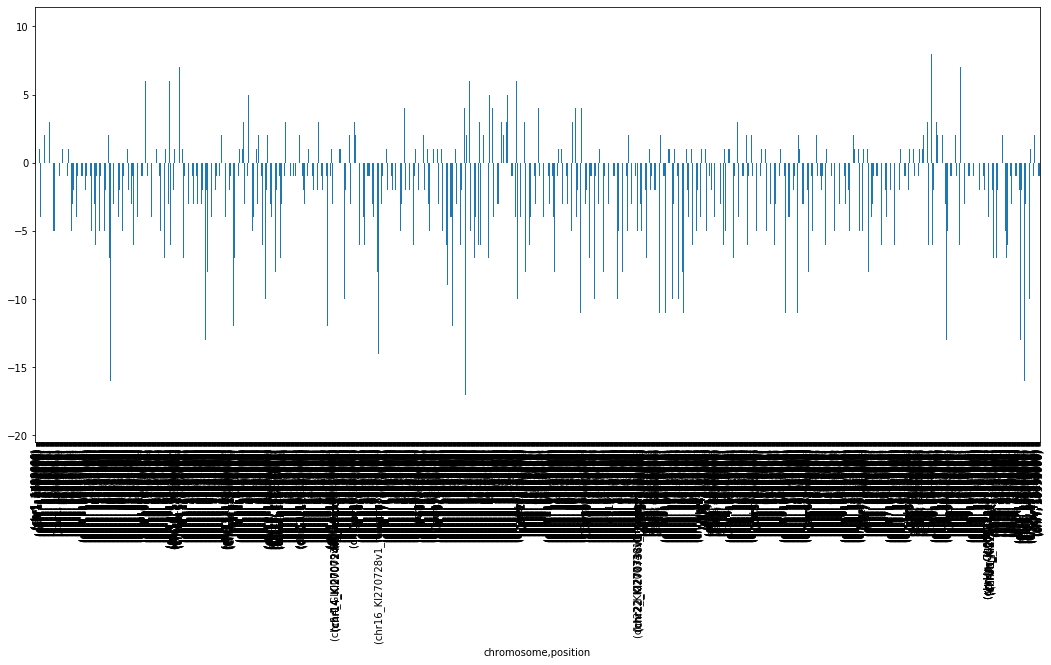

In [172]:
dftnt['diff'].plot(kind='bar')

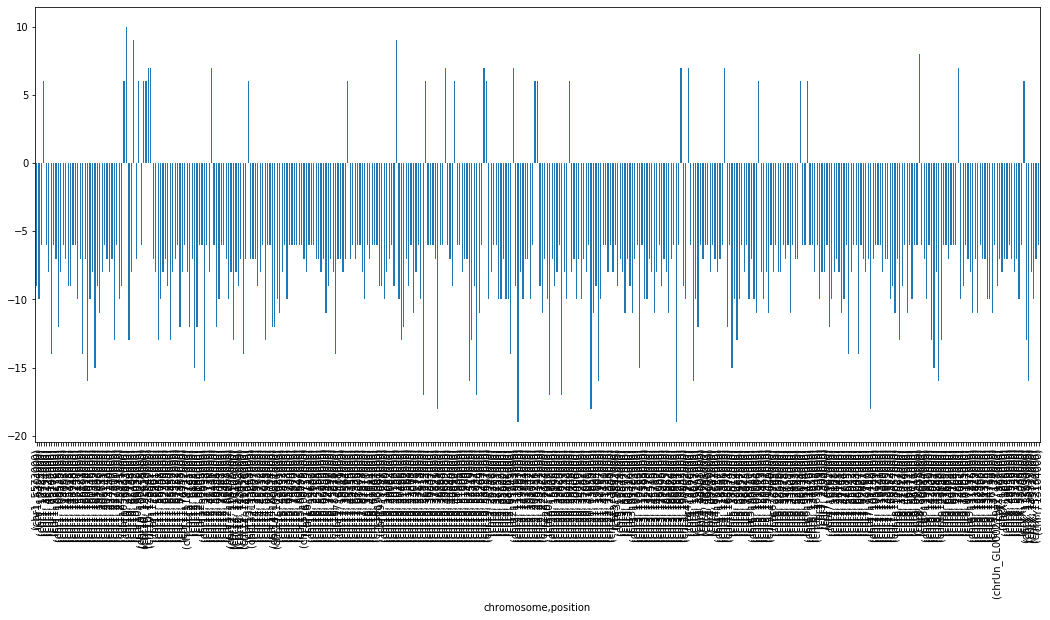

In [173]:
dftnt[(dftnt['diff']>5) | (dftnt['diff']<-5)]['diff'].plot(kind='bar')

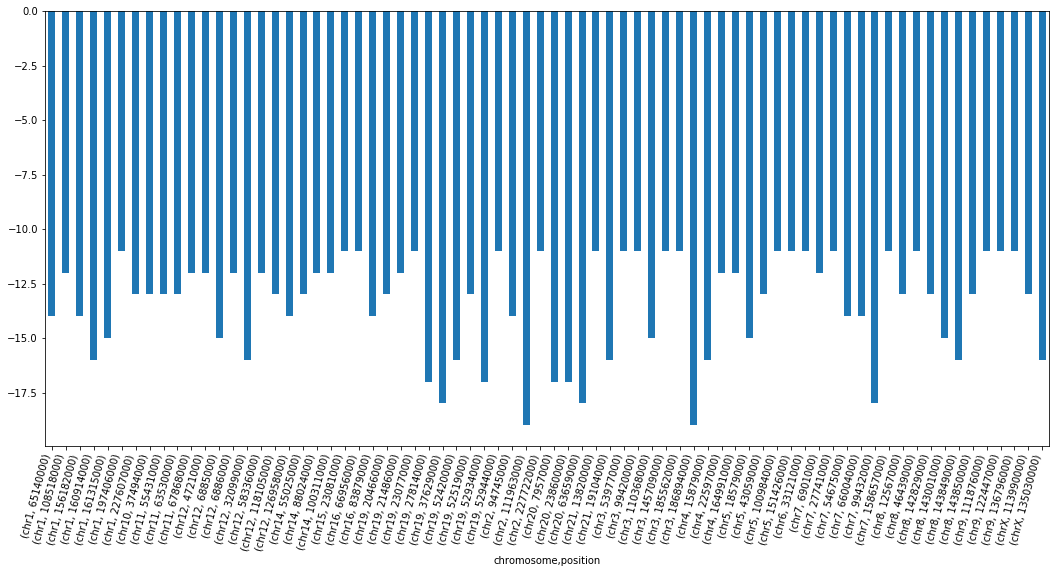

In [174]:
dftnt[(dftnt['diff']>10) | (dftnt['diff']<-10)]['diff'].plot(kind='bar')
plt.xticks(rotation=75,ha='right')
plt.show()

In [175]:
initial_max_rows=pd.get_option('display.max_rows')

In [176]:
pd.set_option('display.max_rows', None)

In [177]:
pd.DataFrame(index=dftnt[(dftnt['diff']>10) | (dftnt['diff']<-10)].index,
             data=dftnt[['diff','normal_count','tumor_count']])


sample                diff  normal_count  tumor_count
chromosome position                                  
chr1       65140000    -14            29           43
           108518000   -12            39           51
           156182000   -14            34           48
           160914000   -16            20           36
           161315000   -15            41           56
           197406000   -11            10           21
           227607000   -13            33           46
chr10      37494000    -13            34           47
chr11      55431000    -13            38           51
           63530000    -13             5           18
           67868000    -12            10           22
chr12      4721000     -12            34           46
           6885000     -15            51           66
           6886000     -12            23           35
           32099000    -16            48           64
           58336000    -12            36           48
           118105000   -13            52           65
           126958000   -14            23           37
chr14      55025000    -13            44           57
           88024000    -12            11           23
           100311000   -12             8           20
chr15      23081000    -11            20           31
chr16      66956000    -11             6           17
           83879000    -14            17           31
chr19      20466000    -13            40           53
           21486000    -12             1           13
           23077000    -11            55           66
           27814000    -17            27           44
           37629000    -18            41           59
           52420000    -16            31           47
           52519000    -13            18           31
           52934000    -17            24           41
           52944000    -11            20           31
chr2       94745000    -14            33           47
           111963000   -19            45           64
           227722000   -11            13           24
chr20      7957000     -17            24           41
           23860000    -17            44           61
           63659000    -18            17           35
chr21      13820000    -11            42           53
           19104000    -16            15           31
chr3       53977000    -11            39           50
           99420000    -11             4           15
           110368000   -15            46           61
           145709000   -11            24           35
           185562000   -11            51           62
           186894000   -19            42           61
chr4       15879000    -16            11           27
           22597000    -12            25           37
           164991000   -12            17           29
chr5       18579000    -15            49           64
           43059000    -13            20           33
           100984000   -11            37           48
           151426000   -11            35           46
chr6       33121000    -11            22           33
chr7       6901000     -12            40           52
           27741000    -11            23           34
           54675000    -14            46           60
           66004000    -14             7           21
           99432000    -18            21           39
           158657000   -11            10           21
chr8       12567000    -13             8           21
           46439000    -11             3           14
           142829000   -13            30           43
           143001000   -15            13           28
           143849000   -16            38           54
           143850000   -13            58           71
chr9       111876000   -11            30           41
           122447000   -11            18           29
           136796000   -11            51           62
chrX       113990000   -13            26           39
           135030000   -16            10           26

In [178]:
pd.set_option('display.max_rows', initial_max_rows)

In [179]:
#df.loc[:,df.columns.str.match('.*-01.$')].shape

In [180]:
#tumor=df.loc[:,df.columns.str.match('.*-01.$')]

In [181]:
#tumor.shape

In [182]:
#df.loc[:,df.columns.str.match('.*-10.$')].shape

In [183]:
#normal=df.loc[:,df.columns.str.match('.*-10.$')]

In [184]:
#normal.shape

In [185]:
#normal[normal>0].count(axis=1)

In [186]:
#normal.loc[:,normal.loc['chr1',1409000]>0]

In [187]:
#tumor.loc[:,tumor.loc['chr1',1409000]>0]

In [188]:
#len(normal.loc[:,normal.loc['chr1',1409000]>0].columns)

In [189]:
#df['normal_count']=df.loc[:,
#    df.columns.str.match('.*-10.$')][ df.loc[:,df.columns.str.match('.*-10.$')]>0 ].count(axis=1)

In [190]:
#df['tumor_count']=df.loc[:,
#    df.columns.str.match('.*-01.$')][ df.loc[:,df.columns.str.match('.*-01.$')]>0 ].count(axis=1)

In [191]:
#df['diff']=df['normal_count']-df['tumor_count']

In [192]:
#df['diff']

In [193]:
#df['diff'].plot(kind='bar')

In [194]:
#df[(df['diff']>10) | (df['diff']<-10)]['diff'].plot(kind='bar')

In [195]:
max_rows=pd.get_option('display.max_rows')

In [196]:
pd.set_option('display.max_rows', None)

In [197]:
#pd.DataFrame(df[(df['diff']>10) | (df['diff']<-10)].index)

In [198]:
pd.set_option('display.max_rows', max_rows)